## Маргасов Арсений, группа DS-21

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("colorblind")
figsize = (15,8)
legend_fontsize = 12

from matplotlib import rc
rc('font',**{'family':'sans-serif', 'size': 12})
rc('figure', **{'dpi': 300})

# Часть I: О теореме Байеса

## 1. 
Прокурор посчитал такую вероятность: $ 1 - \mathbb{P}(\textbf{редкая группа крови}|\textbf{невиновность}) $, т.е. он посчитал, что $\mathbb{P}(\textbf{редкая группа крови}|\textbf{невиновность})$ и $\mathbb{P}(\textbf{виновность}|\textbf{редкая группа крови})$ составляют полную группу событий, хотя это не так. 

А для того, чтобы доказать виновность, он должен был посчитать: $ \mathbb{P}(\textbf{виновность}|\textbf{редкая группа крови}) $.

Поэтому прокурор не прав, потому что эти вероятности не равны.

## 2. 
Адвокат не прав, потому что он подумал, что оценил $\mathbb{P}(\textbf{виновность}|\textbf{редкая группа крови, выбранный город})$, а на самом деле он оценил $\mathbb{P}(\textbf{редкая группа крови, выбранный город})$.

## 3.
    Запишем сначала формулы:
$$ Posterior_{d = 1 | t = 0} = \mathbb{P}(d = 1 | t = 0) = \frac{\mathbb{P}(FN) * 0.01}{\mathbb{P}(FN) * 0.01 + (1 - \mathbb{P}(FP)) * 0.99}$$
$$ Posterior_{d = 1 | t = 1} = \mathbb{P}(d = 1 | t = 1) = \frac{(1 - \mathbb{P}(FN)) * 0.01}{(1 - \mathbb{P}(FN)) * 0.01 + \mathbb{P}(FP) * 0.99} $$

In [2]:
FIXED_P_FN = 0.05
FIXED_P_FP = 0.05

def posterior_d_1_t_0(P_FN, P_FP):
    return P_FN * 0.01 / (P_FN * 0.01 + (1 - P_FP) * 0.99)

def posterior_d_1_t_1(P_FN, P_FP):
    return (1 - P_FN) * 0.01 / ((1 - P_FN) * 0.01 + P_FP * 0.99)

In [3]:
x = np.linspace(0.05, 0, 1000)

### $ Posterior_{d = 1 | t = 0} $

In [4]:
y_fixed_p_fn_1 = list(map(lambda i: posterior_d_1_t_0(P_FN=FIXED_P_FN, P_FP=i), x))
y_fixed_p_fp_1 = list(map(lambda i: posterior_d_1_t_0(P_FN=i, P_FP=FIXED_P_FP), x))

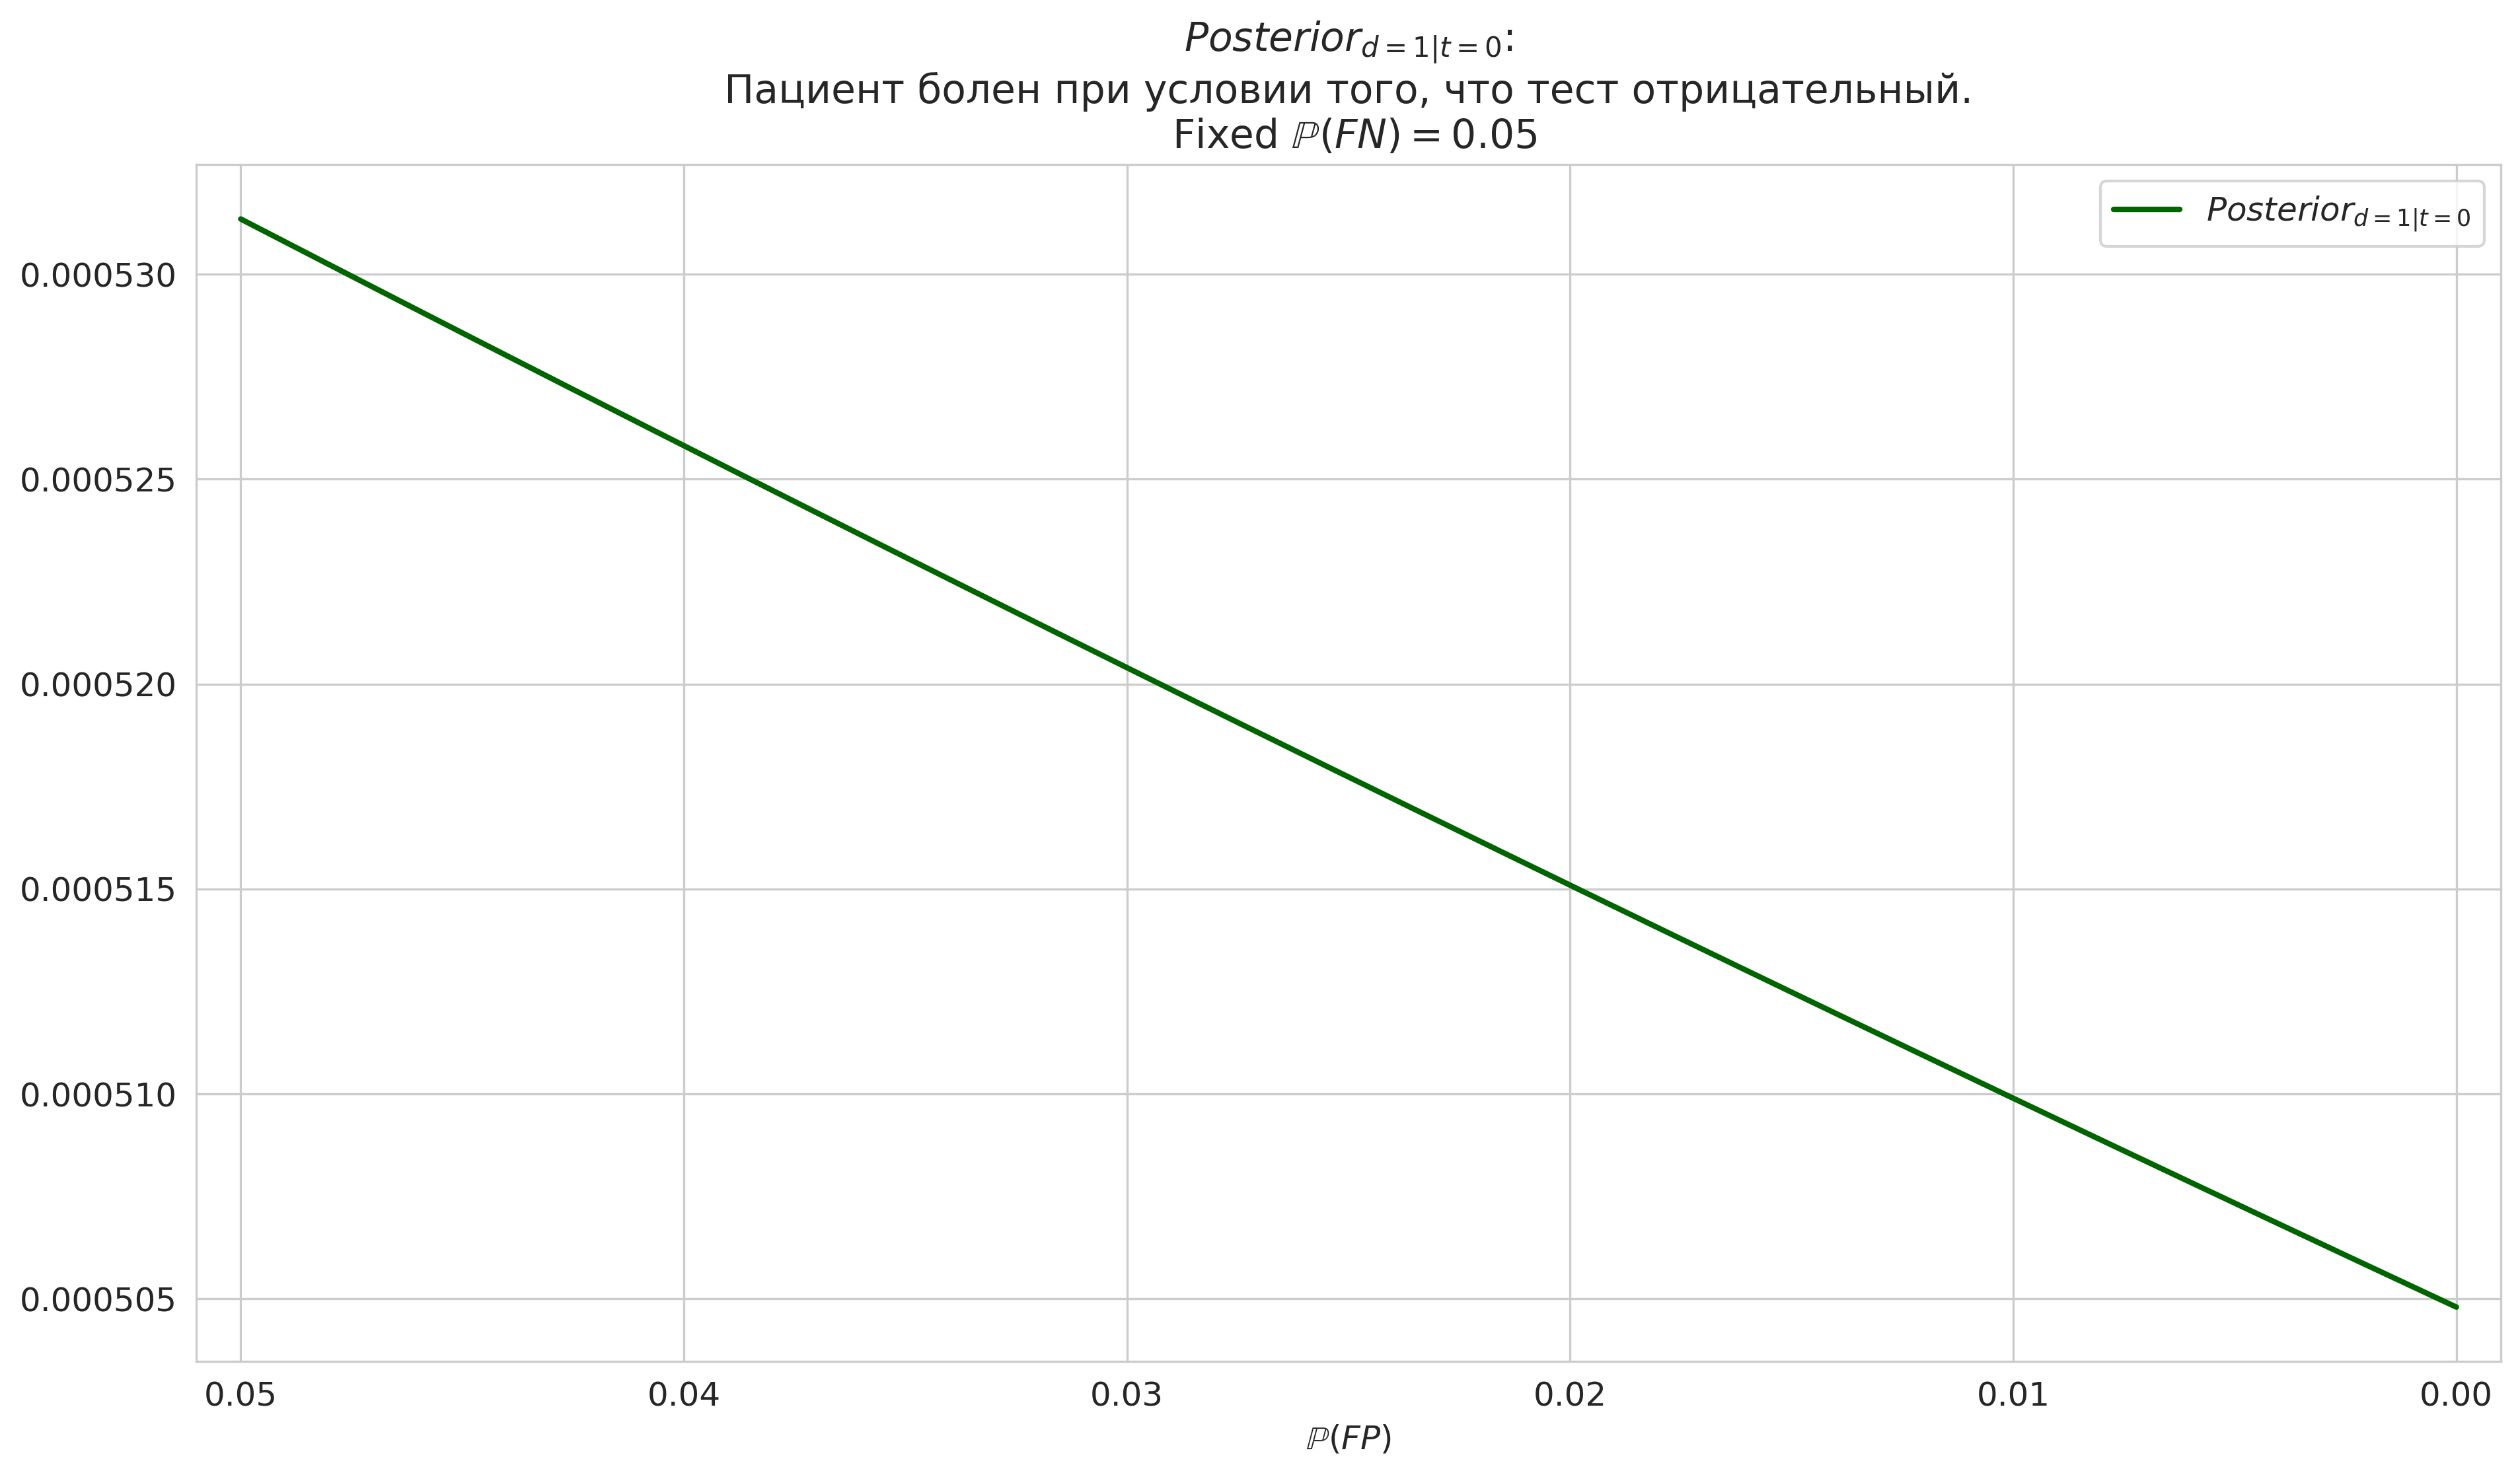

In [5]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim(0.051, -0.001)
ax.set_xlabel("$\mathbb{P}(FP)$")
ax.plot(x, y_fixed_p_fn_1, label="$ Posterior_{d = 1 | t = 0} $", c="darkgreen", linewidth=2)
ax.set_title("$ Posterior_{d = 1 | t = 0} $:\n Пациент болен при условии того, что тест отрицательный. \n Fixed $ \mathbb{P}(FN) = 0.05 $")
ax.legend(fontsize=legend_fontsize)

На данном графике можно заметить, что при уменьшении $\mathbb{P}(FP)$ (т.е. при уменьшении вероятности того, что тест покажет, что человек болен, хотя он здоров), апостериорная вероятность болезни пациента при условии того, что тест отрицательный, уменьшается довольно слабо. 

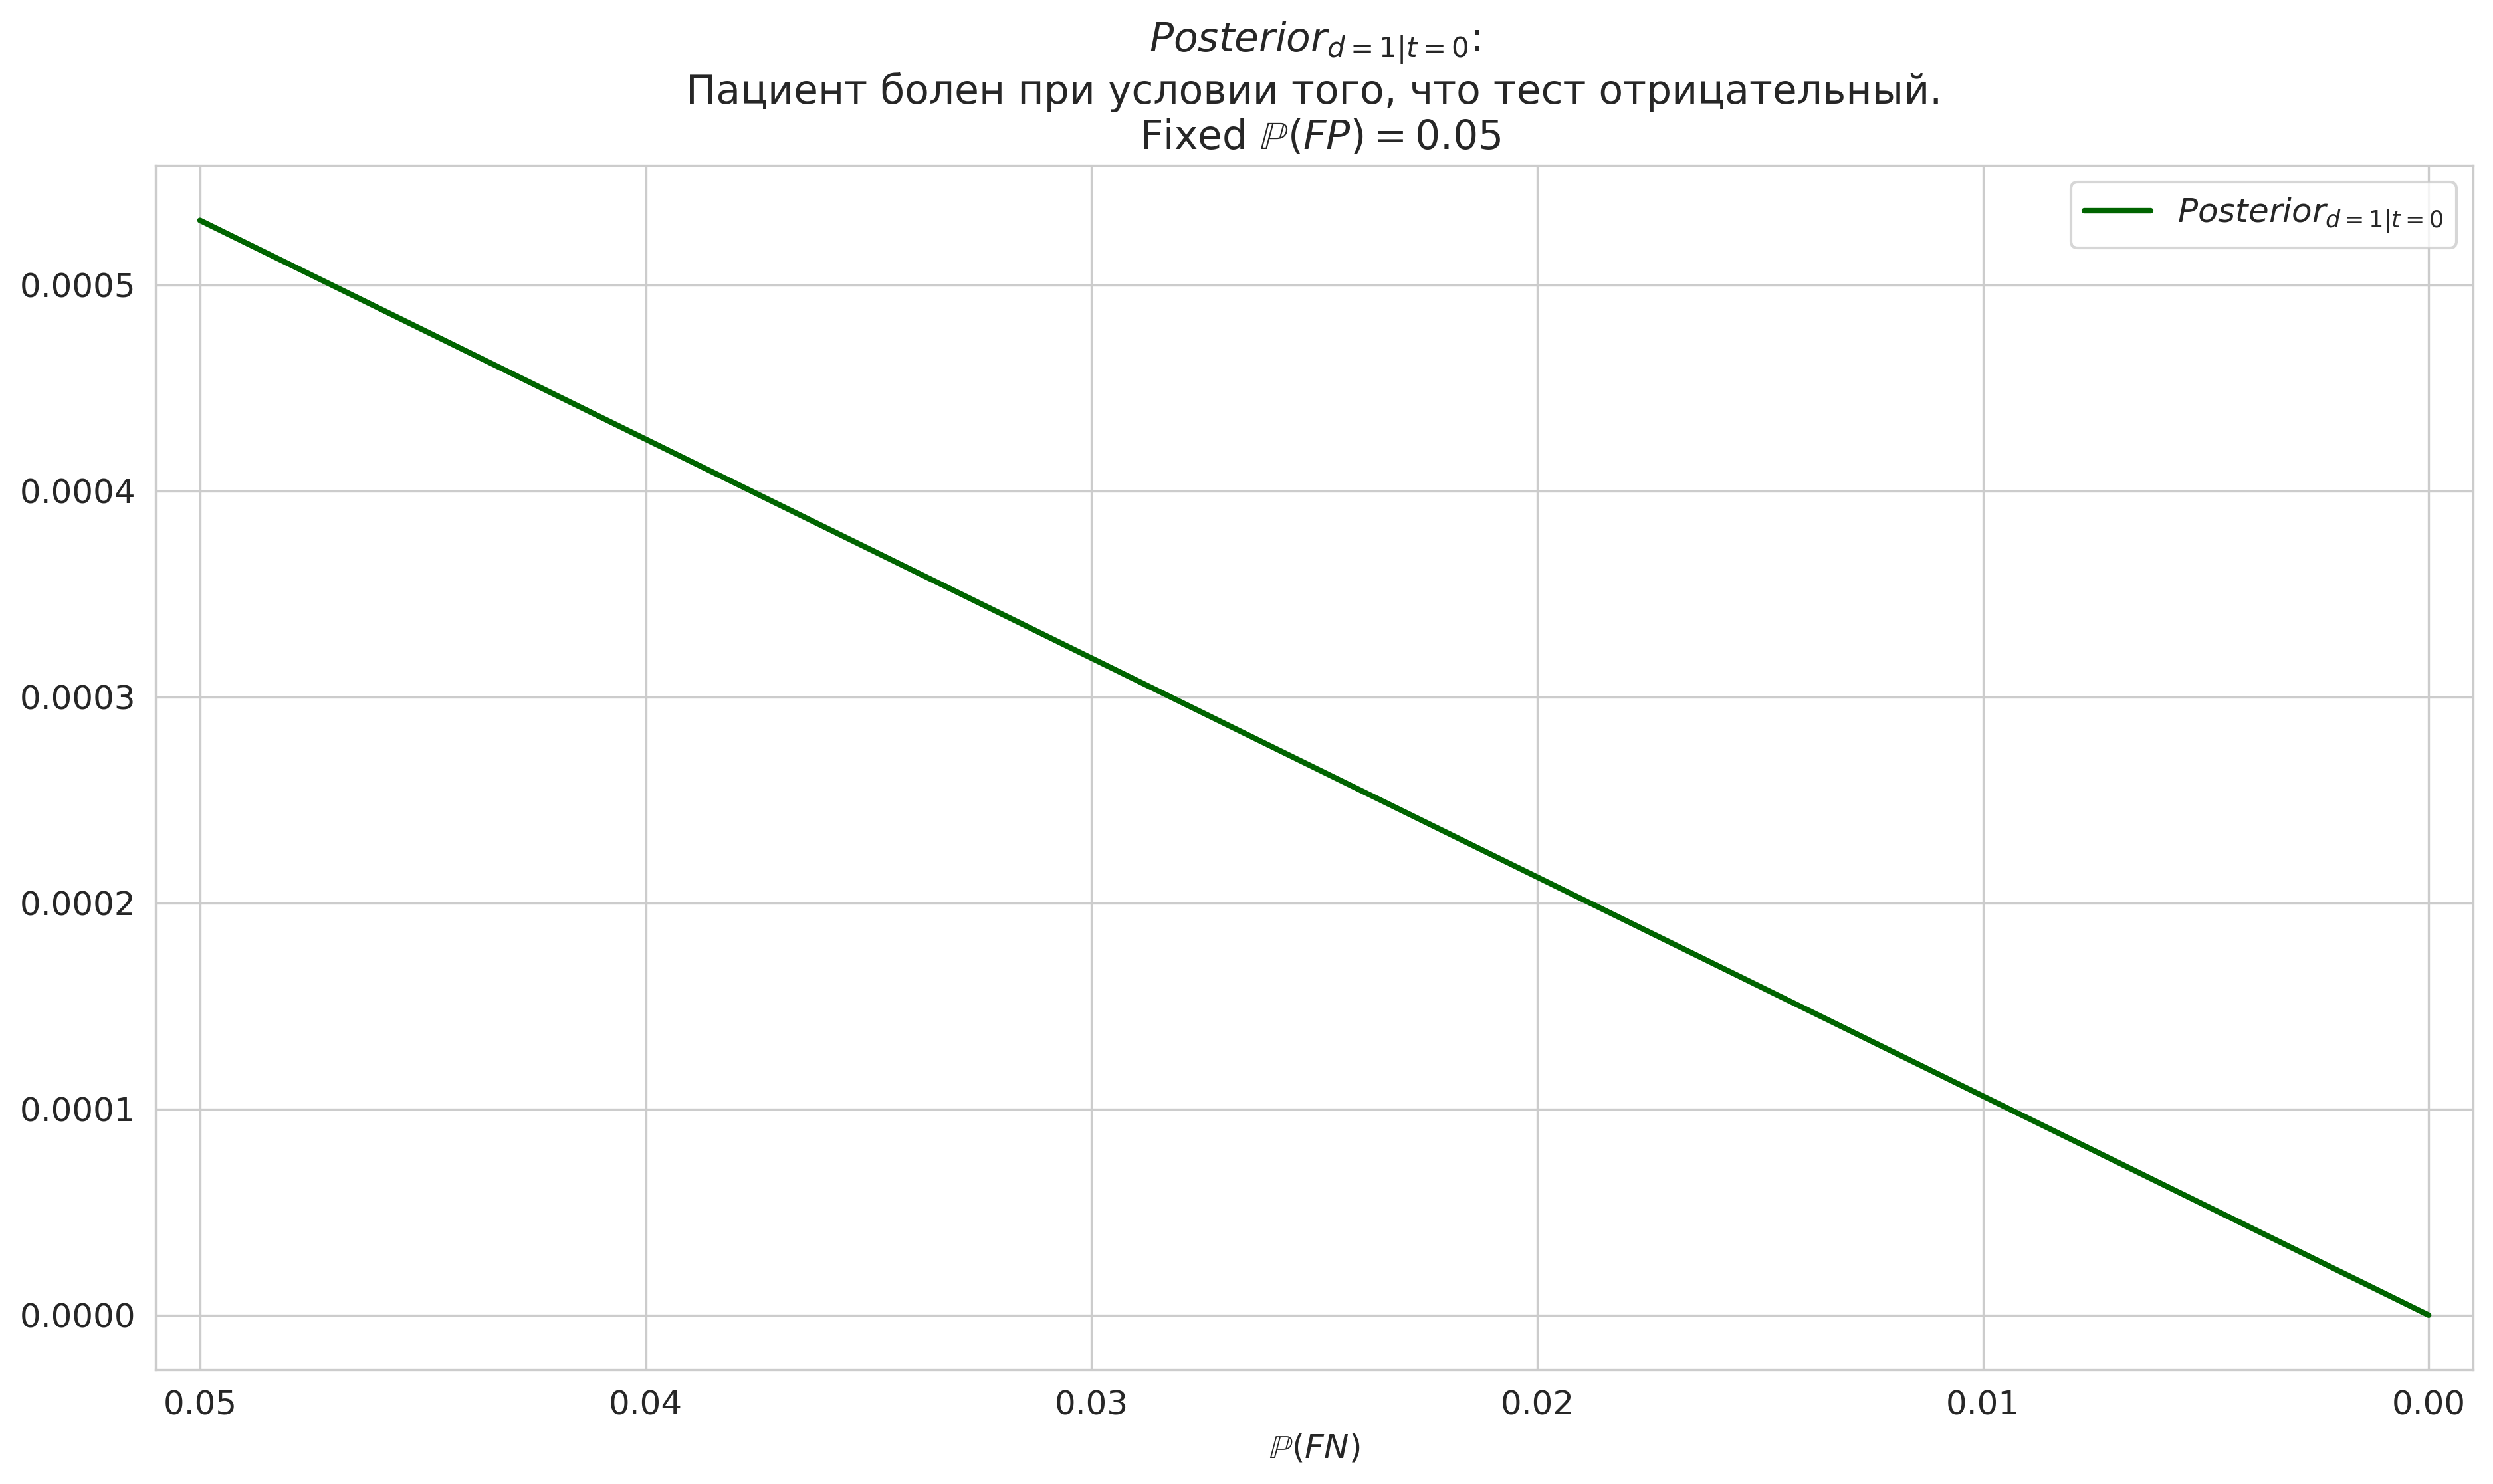

In [6]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim(0.051, -0.001)
ax.set_xlabel("$\mathbb{P}(FN)$")
ax.plot(x, y_fixed_p_fp_1, label="$ Posterior_{d = 1 | t = 0} $", c="darkgreen", linewidth=2)
ax.set_title("$ Posterior_{d = 1 | t = 0} $:\n Пациент болен при условии того, что тест отрицательный. \n Fixed $\mathbb{P}(FP) = 0.05 $")
ax.legend(fontsize=legend_fontsize)

На данном графике можно заметить, что при уменьшении $\mathbb{P}(FN)$ (т.е. при уменьшении вероятности того, что тест покажет, что человек здоров, хотя он болен), апостериорная вероятность болезни пациента при условии того, что тест отрицательный, уменьшается. 

### $ Posterior_{d = 1 | t = 1} $

In [7]:
y_fixed_p_fn_2 = list(map(lambda i: posterior_d_1_t_1(P_FN=FIXED_P_FN, P_FP=i), x))
y_fixed_p_fp_2 = list(map(lambda i: posterior_d_1_t_1(P_FN=i, P_FP=FIXED_P_FP), x))

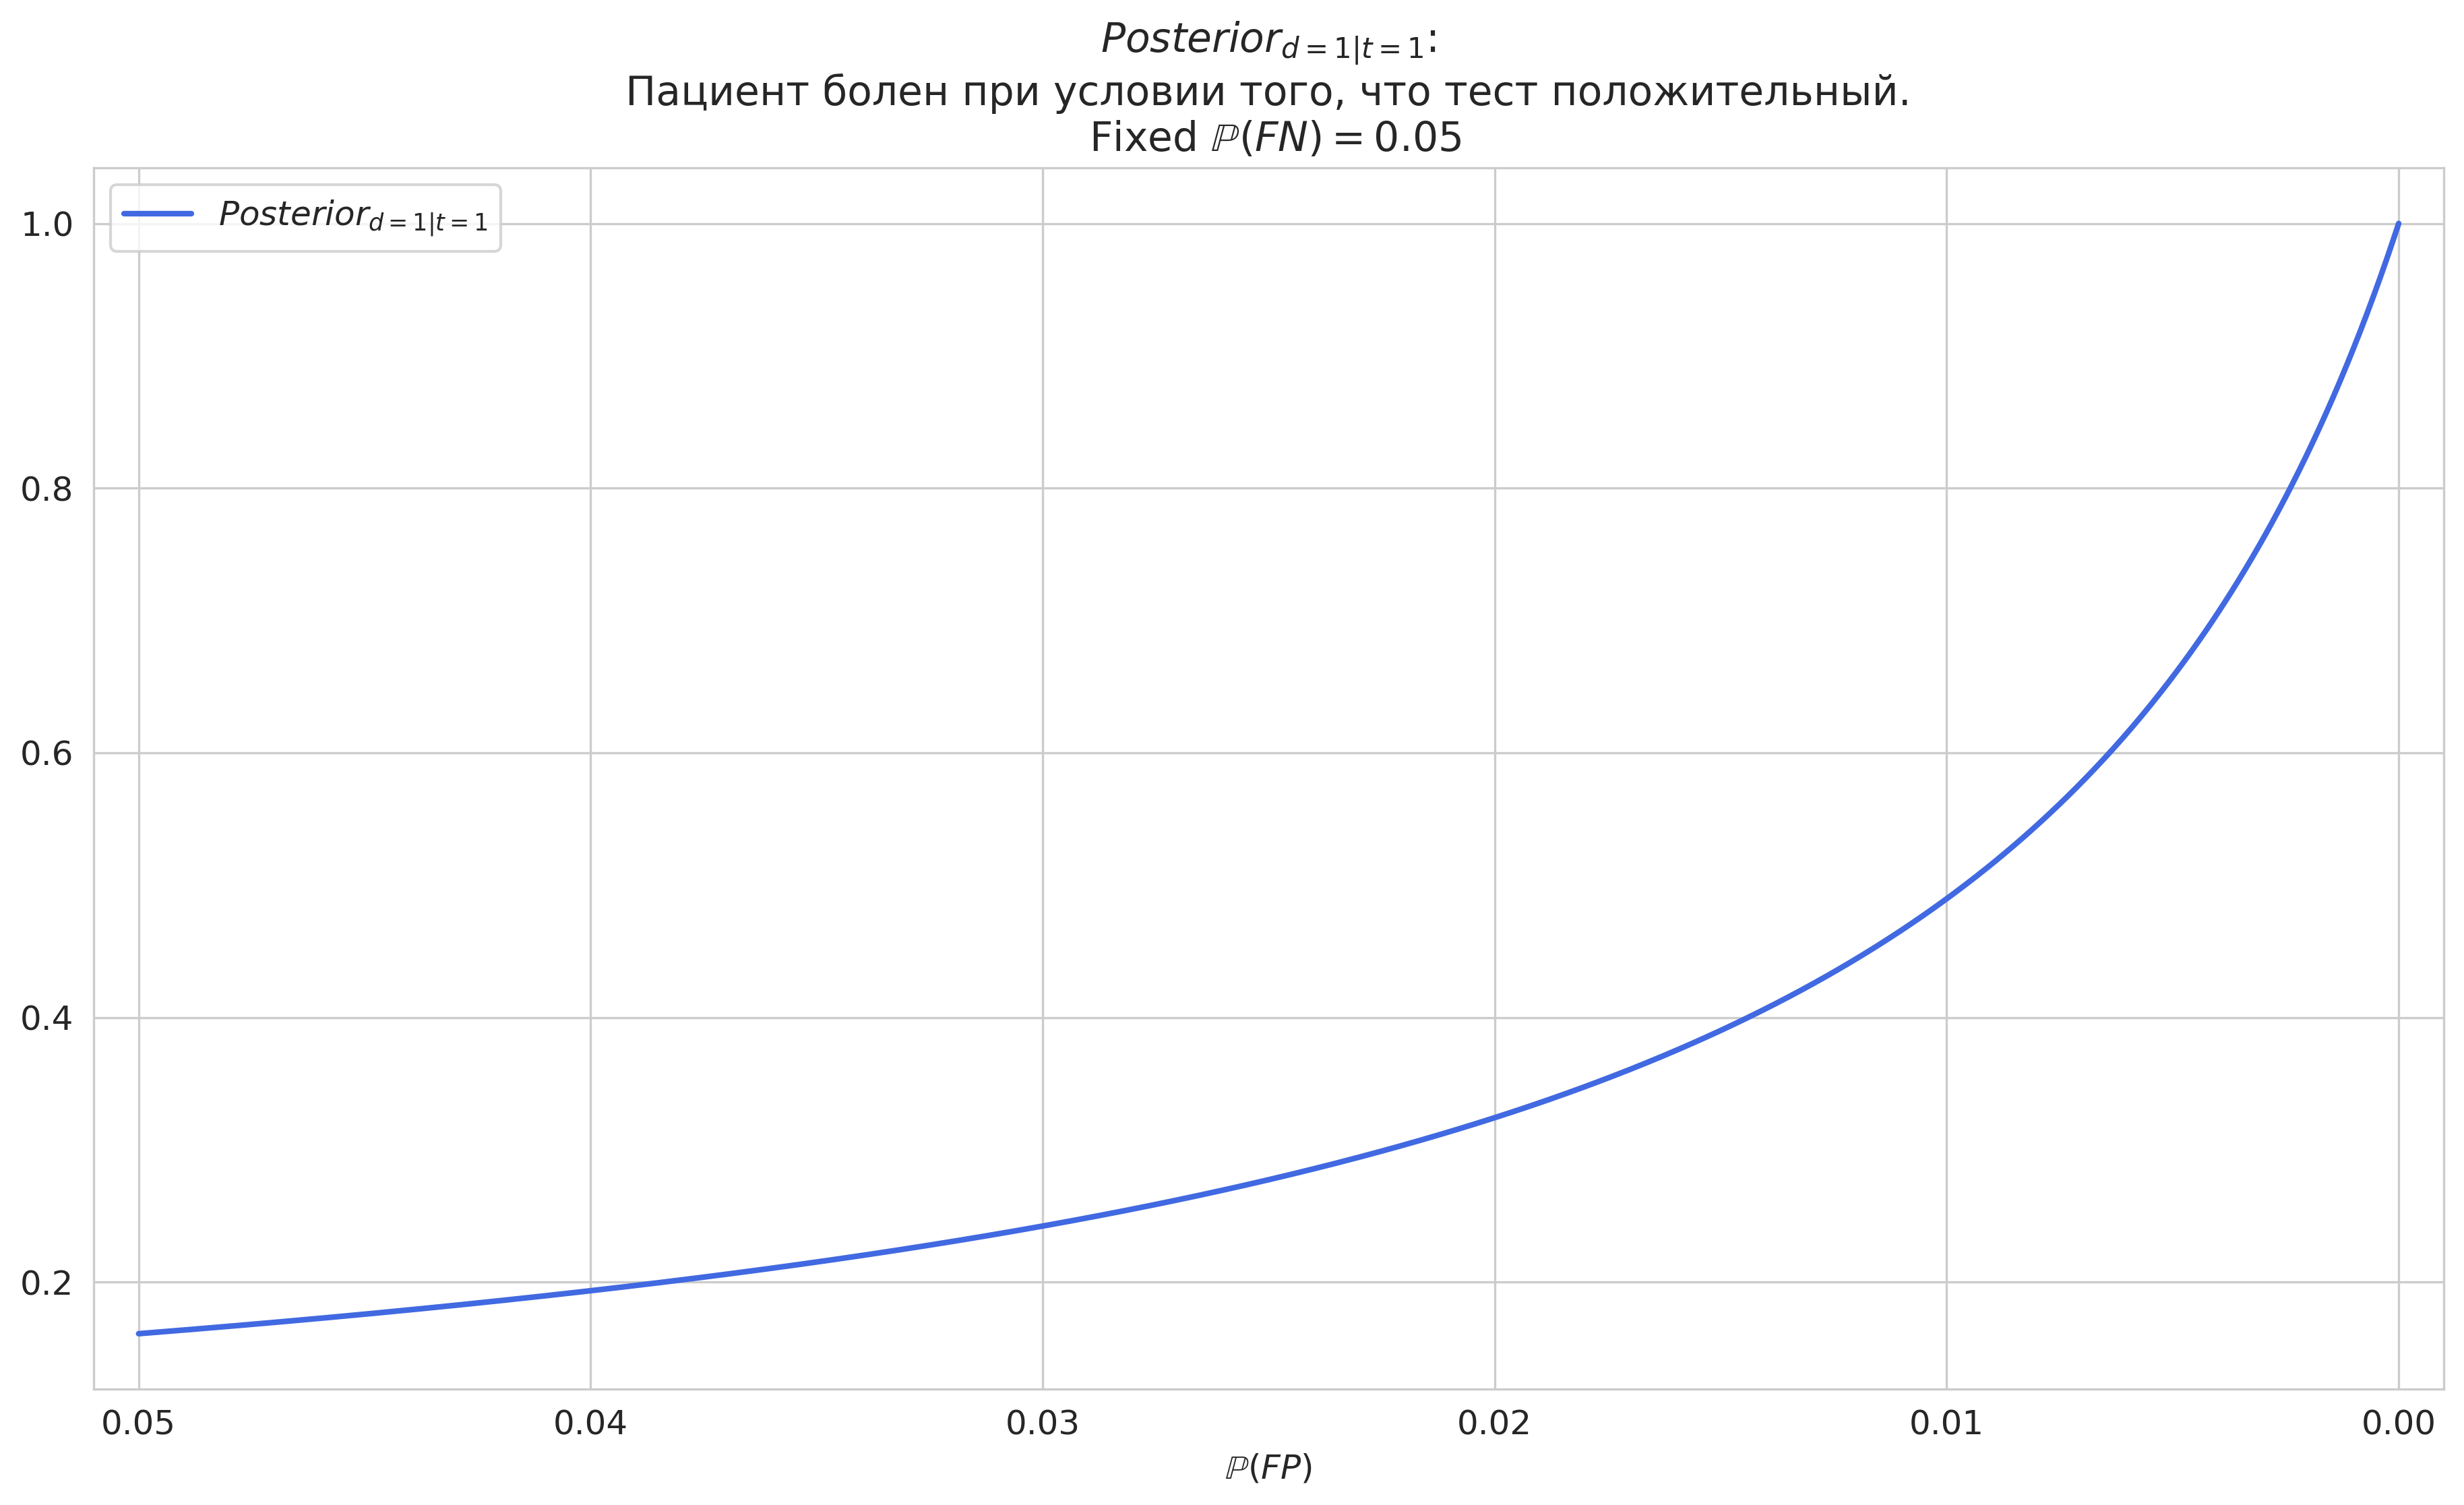

In [8]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim(0.051, -0.001)
ax.set_xlabel("$\mathbb{P}(FP)$")
ax.plot(x, y_fixed_p_fn_2, label="$ Posterior_{d = 1 | t = 1} $", c="royalblue", linewidth=2)
ax.set_title("$ Posterior_{d = 1 | t = 1} $:\n Пациент болен при условии того, что тест положительный. \n Fixed $\mathbb{P}(FN) = 0.05$")
ax.legend(fontsize=legend_fontsize)

На данном графике можно заметить, что при уменьшении $\mathbb{P}(FP)$ (т.е. при уменьшении вероятности того, что тест покажет, что человек болен, хотя он здоров), апостериорная вероятность болезни пациента при условии того, что тест положительный, растет довольно быстро и достигает $1$. 

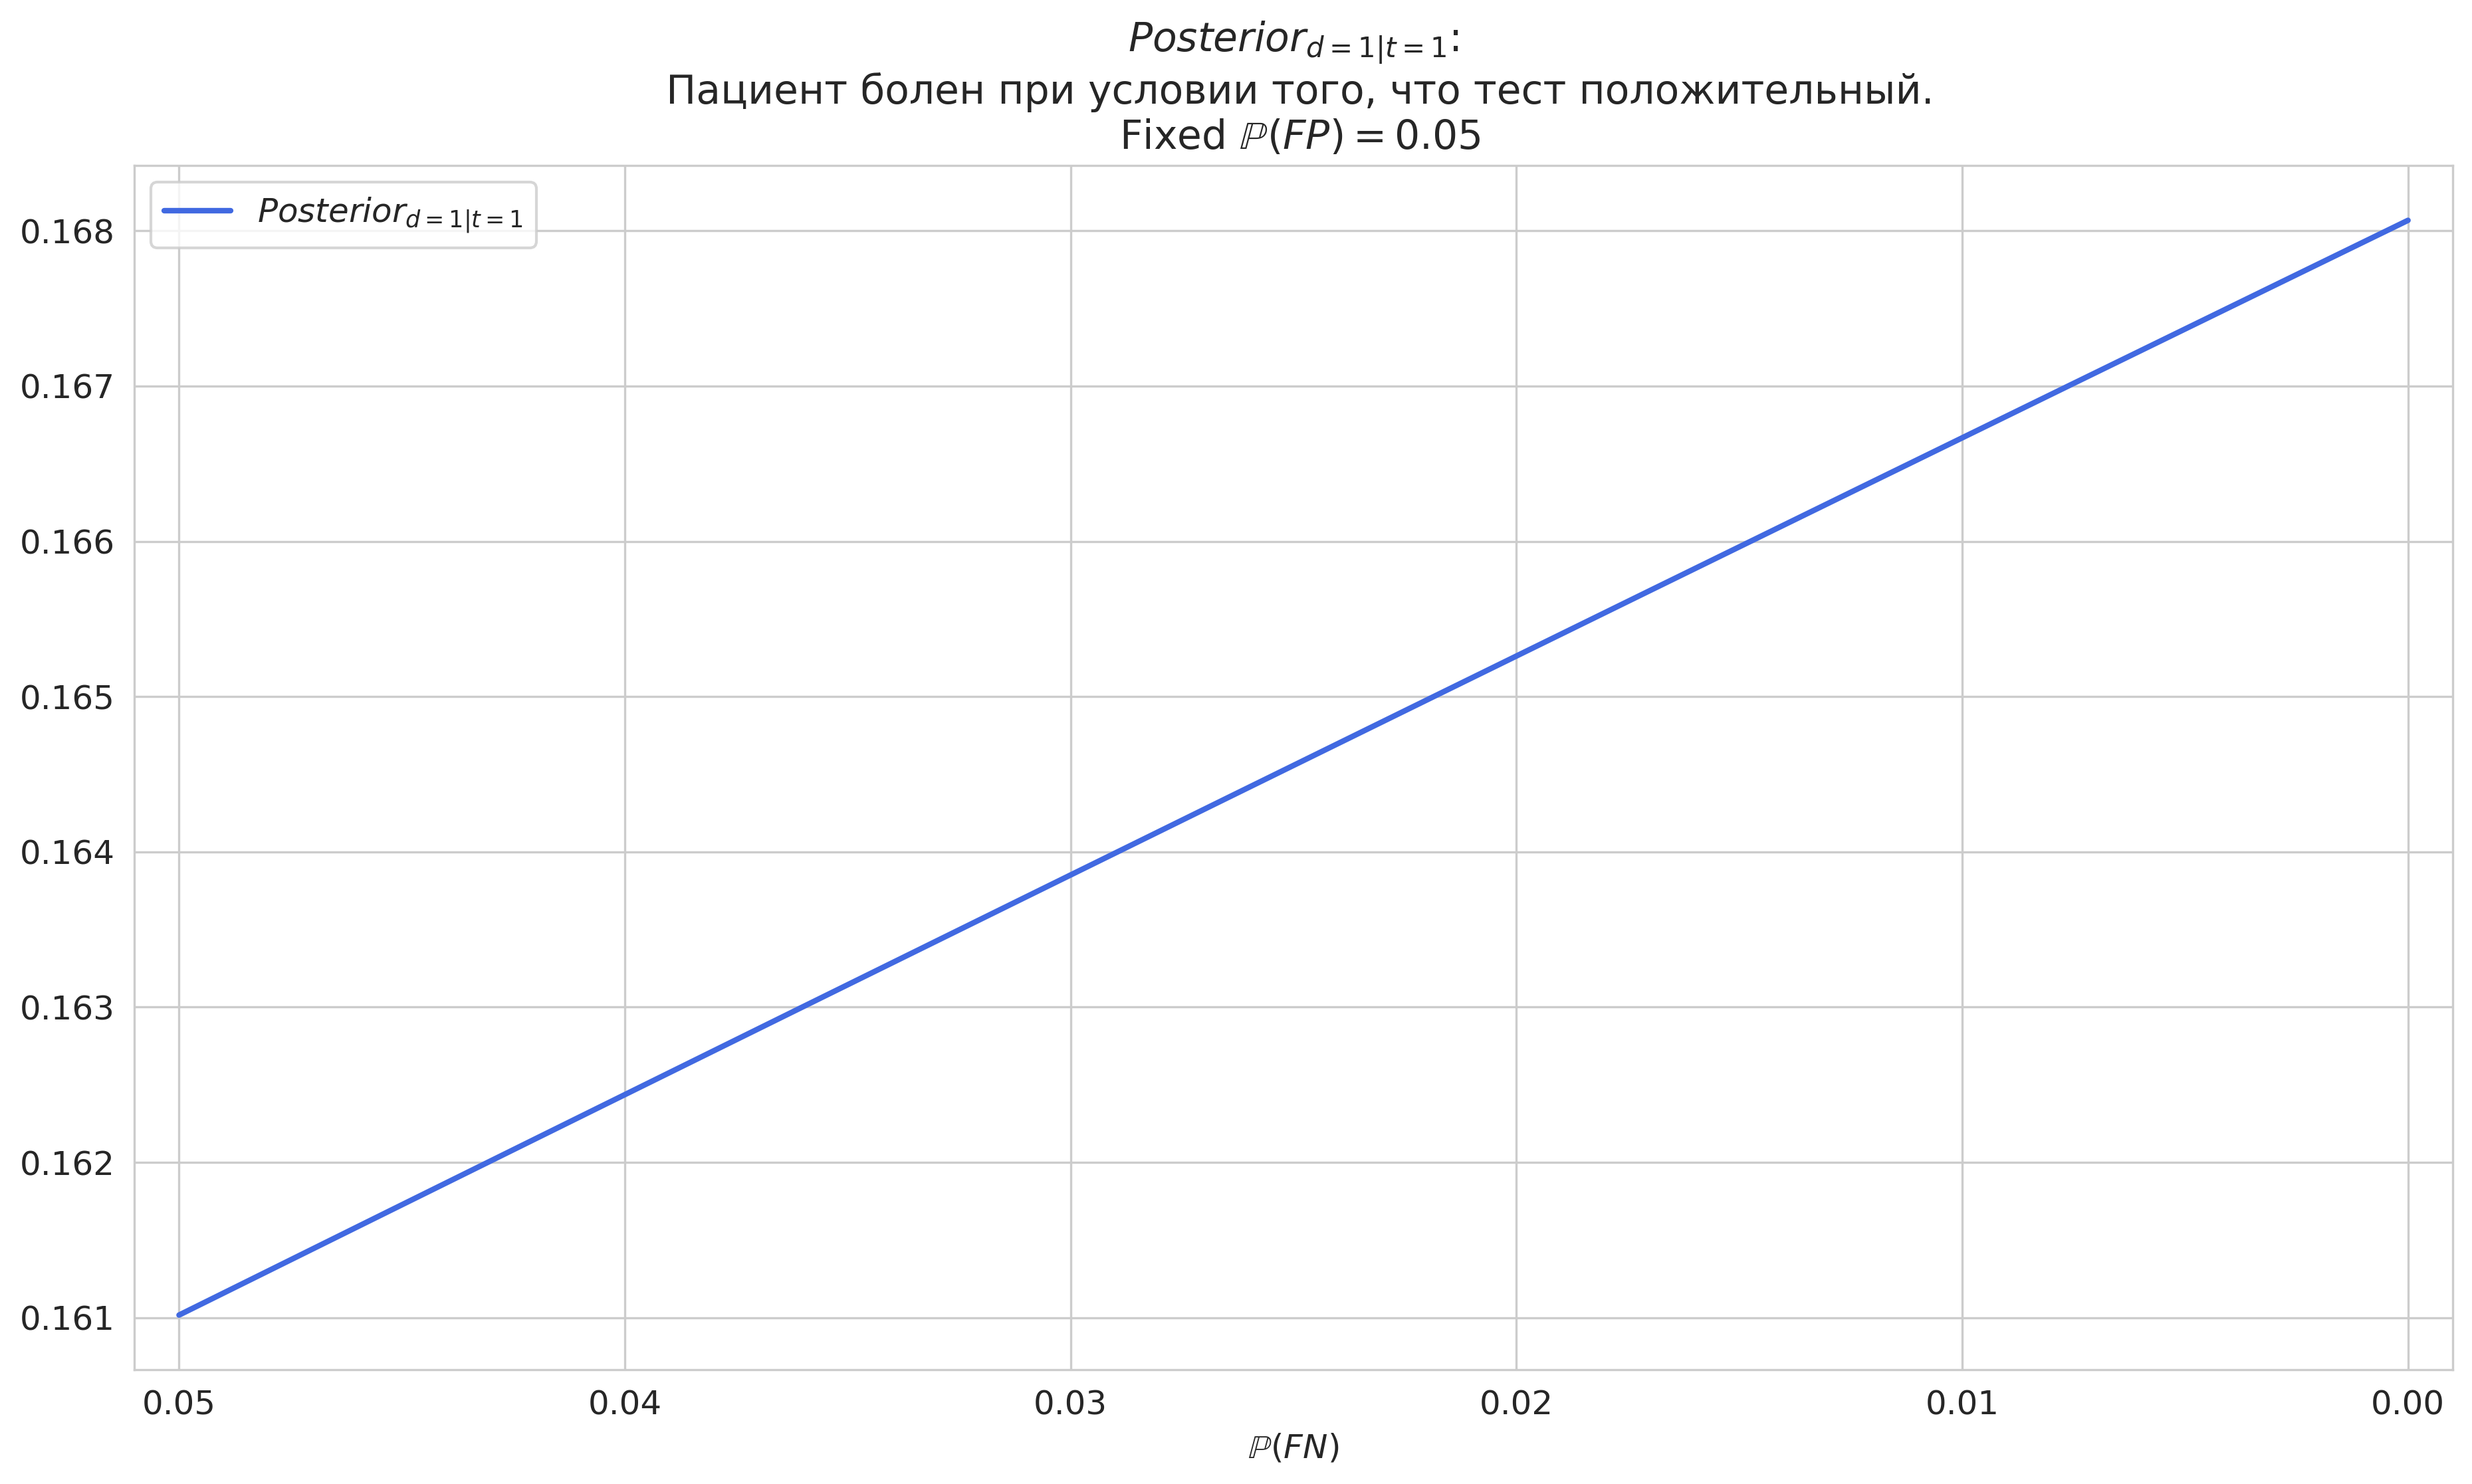

In [9]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim(0.051, -0.001)
ax.set_xlabel("$\mathbb{P}(FN)$")
ax.plot(x, y_fixed_p_fp_2, label="$Posterior_{d = 1 | t = 1}$", c="royalblue", linewidth=2)
ax.set_title("$ Posterior_{d = 1 | t = 1} $:\n Пациент болен при условии того, что тест положительный.\n Fixed $\mathbb{P}(FP) = 0.05$")
ax.legend(fontsize=legend_fontsize)
plt.show()

На данном графике можно заметить, что при уменьшении $\mathbb{P}(FP)$ (т.е. при уменьшении вероятности того, что тест покажет, что человек здоров, хотя он болен), апостериорная вероятность болезни пациента при условии того, что тест положительный, растет довольно слабо.

### Выводы
#### Опираясь на графики выше можно сделать следующие выводы:
1. Если зафиксировать $\mathbb{P}(FN)$ на уровне $0.05$ и устремить $\mathbb{P}(FP)$ к нулю, то:
    * Почти наверное при получении положительного теста пациент будет болен, что позволит с значительно большей точностью определять больных;
    * Немного уменьшится апостериорная вероятность того, что пациент болен при отрицательном тесте.


2. Если зафиксировать $\mathbb{P}(FP)$ на уровне $0.05$ и устремить $\mathbb{P}(FN)$ к нулю, то:
    * Незначительно вырастет апостериорная вероятность того, что пациент болен при условии того, что тест положительный;
    * Почти наверное не будет ошибки, когда пациент болен, а тест показывает отрицательный результат. 

Используя предположение о том, что большая $\mathbb{P}(FN)$ хуже, чем $\mathbb{P}(FP)$, посколько невыявленная болезнь хуже, чем ошибка о её наличии, получаем, что второй вариант с фиксацией $\mathbb{P}(FP)$ на уровне $0.05$ является более предпочтительным, хотя в зависимости от конкретной ситуации можно выбрать первый вариант.

# Часть II: О линейной регрессии

## 1

In [10]:
TRAIN_SIZE = 50
COLS_TO_USE = [
    "date",
    "total_cases",
    "new_cases"
]

In [11]:
covid19_df = pd.read_csv("./owid-covid-data.csv")
covid19_df = covid19_df.loc[(covid19_df["iso_code"] == "RUS") & (covid19_df["date"] >= "2020-03-03")].loc[:, COLS_TO_USE]
covid19_df["date"] = range(1, len(covid19_df) + 1)
covid19_df["new_cases"] = covid19_df["new_cases"].apply(lambda x: 1 if x <= 0 else x)
train_df = covid19_df.iloc[:TRAIN_SIZE, :]
test_df = covid19_df.iloc[TRAIN_SIZE:, :]

In [12]:
train_df.head()

date  total_cases  new_cases
52285     1          3.0        1.0
52286     2          3.0        1.0
52287     3          4.0        1.0
52288     4         13.0        9.0
52289     5         13.0        1.0

In [13]:
test_df.head()

date  total_cases  new_cases
52335    51      57999.0     5236.0
52336    52      62773.0     4774.0
52337    53      68622.0     5849.0
52338    54      74588.0     5966.0
52339    55      80949.0     6361.0

## 2

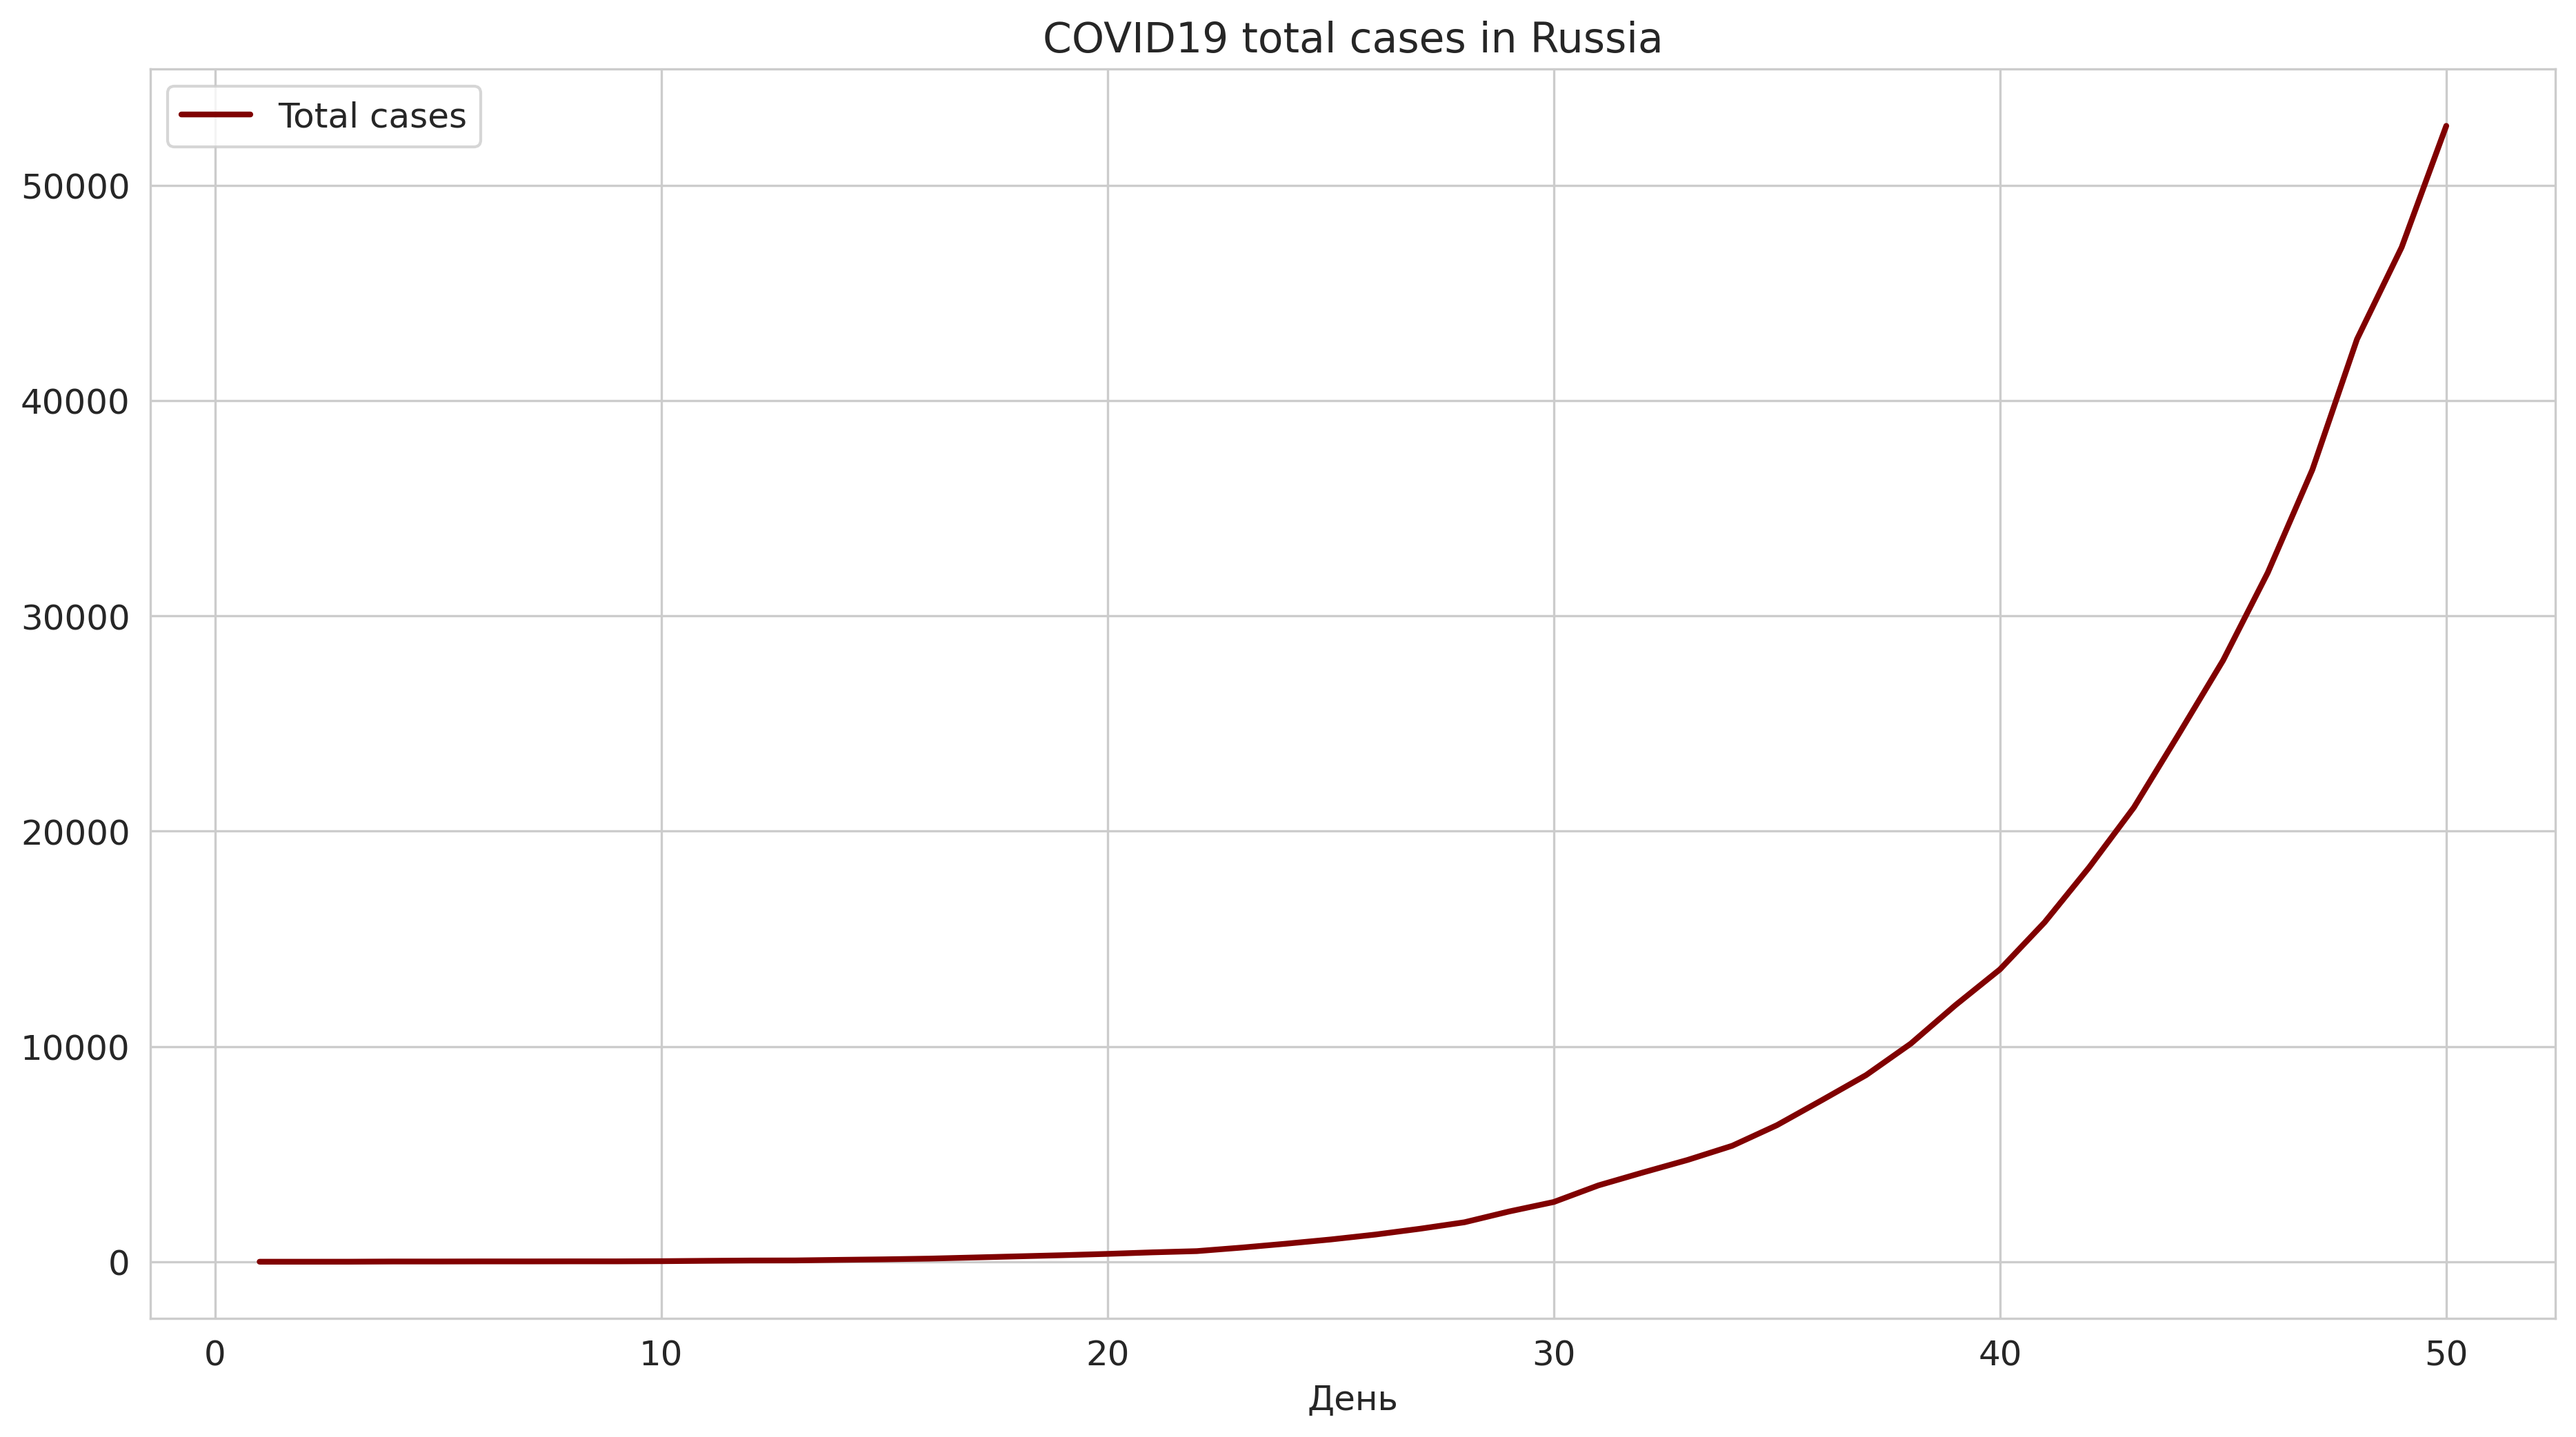

In [14]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlabel("День")
ax.plot(train_df["date"], train_df["total_cases"], label="Total cases", c="maroon", linewidth=2)
ax.set_title("COVID19 total cases in Russia")
ax.legend(fontsize=legend_fontsize)
plt.show()

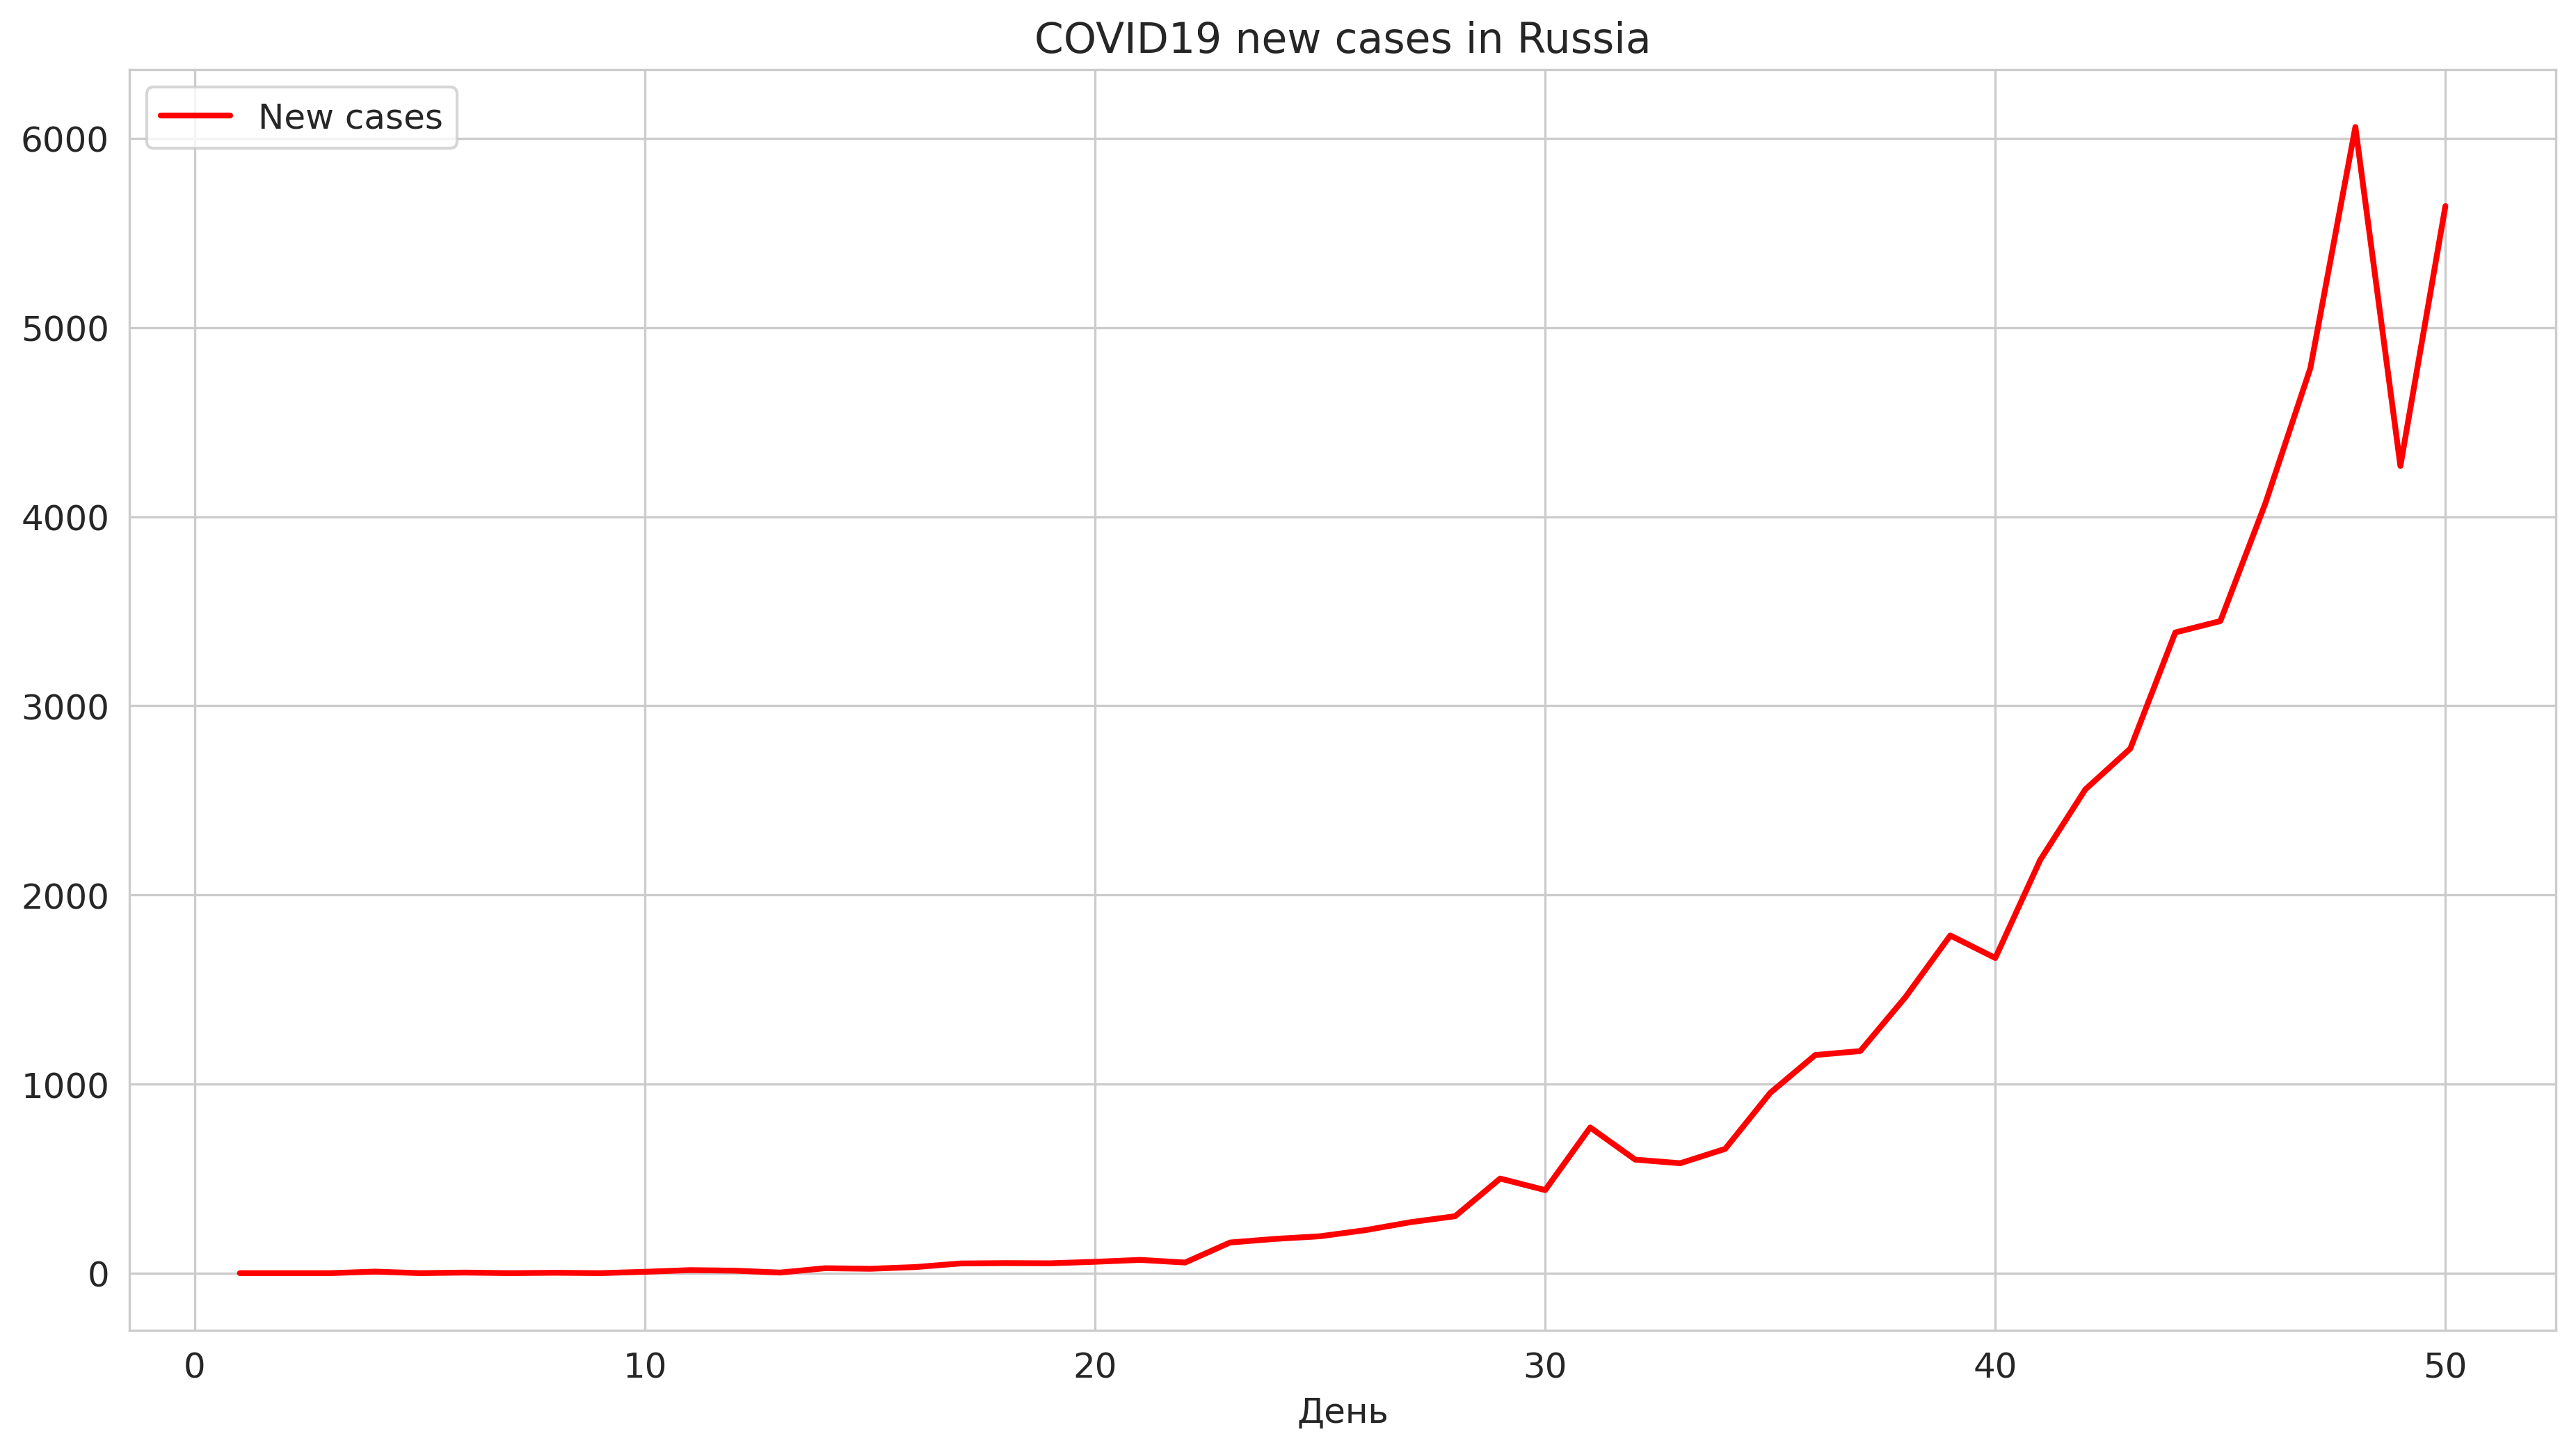

In [15]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlabel("День")
ax.plot(train_df['date'], train_df["new_cases"], label="New cases", c="red", linewidth=2)
ax.set_title("COVID19 new cases in Russia")
ax.legend(fontsize=legend_fontsize)
plt.show()

### a.

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr_total_cases = LinearRegression().fit(train_df["date"].values.reshape(-1, 1), np.log(train_df["total_cases"]))
lr_new_cases = LinearRegression().fit(train_df["date"].values.reshape(-1, 1), np.log(train_df["new_cases"]))

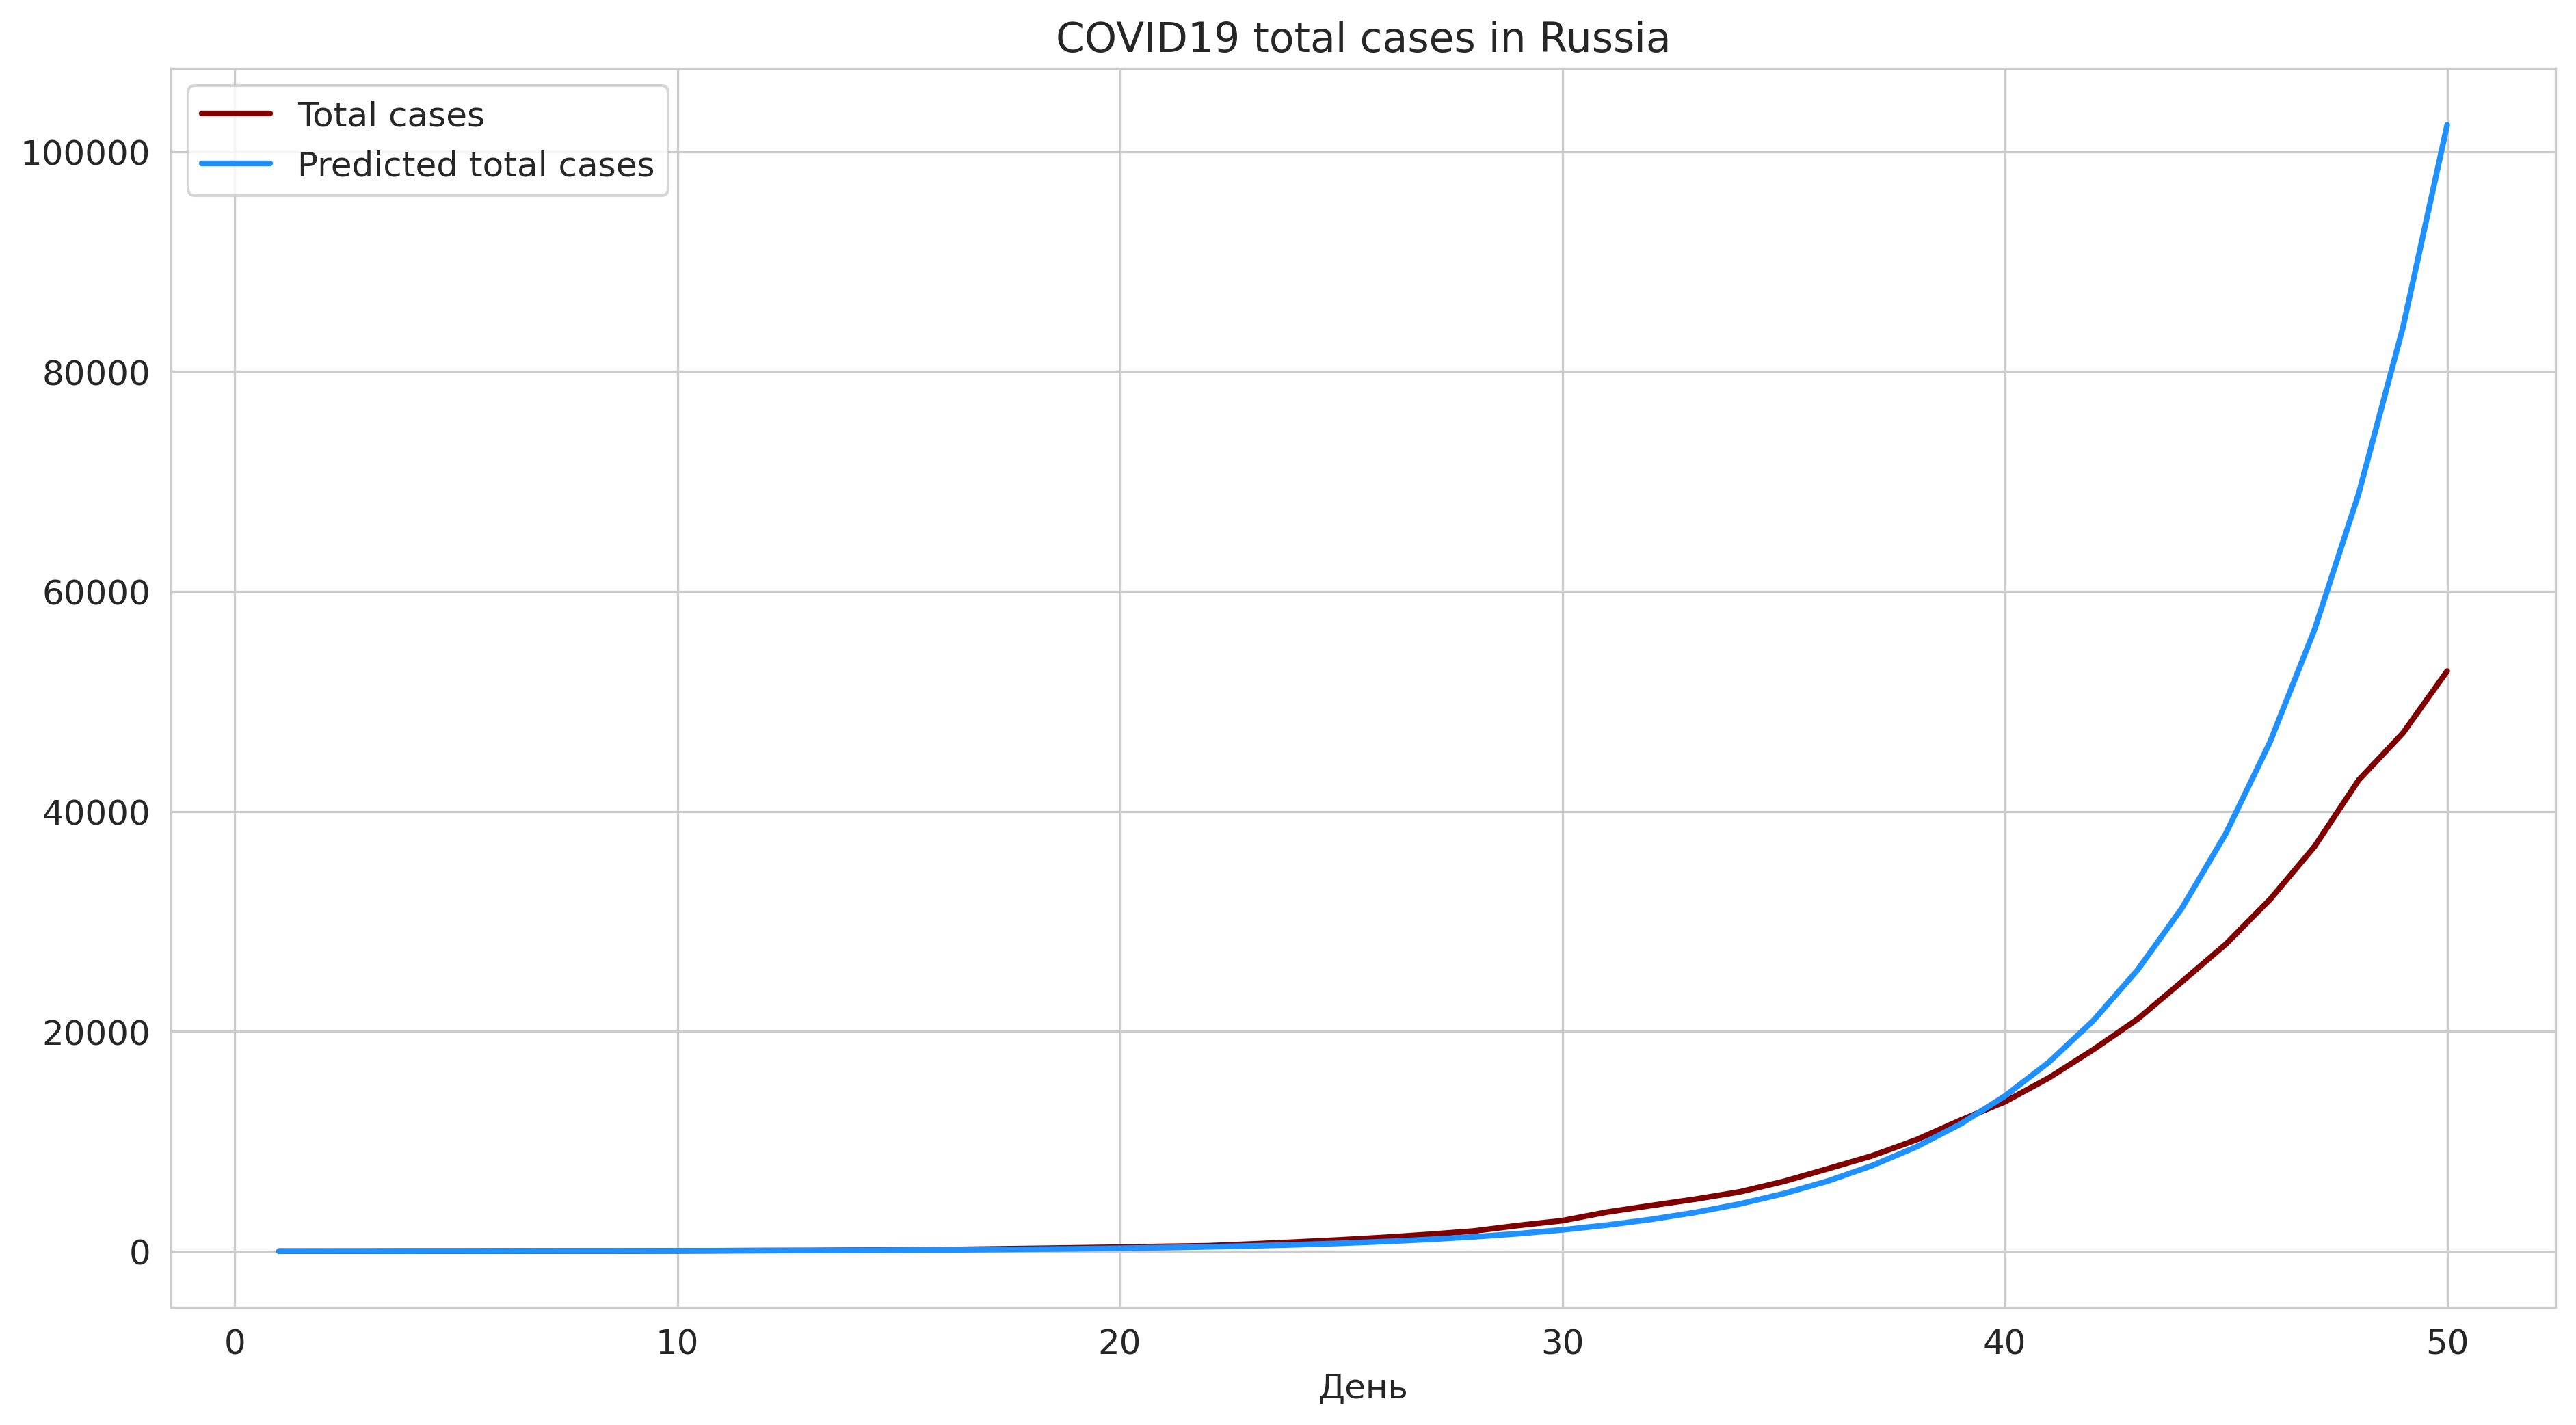

In [18]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlabel("День")
ax.plot(train_df["date"], train_df["total_cases"], label="Total cases", c="maroon", linewidth=2)
ax.plot(train_df["date"], np.exp(lr_total_cases.predict(train_df["date"].values.reshape(-1, 1))), 
        label="Predicted total cases", c="dodgerblue", linewidth=2)
ax.set_title("COVID19 total cases in Russia")
ax.legend(fontsize=legend_fontsize)
plt.show()

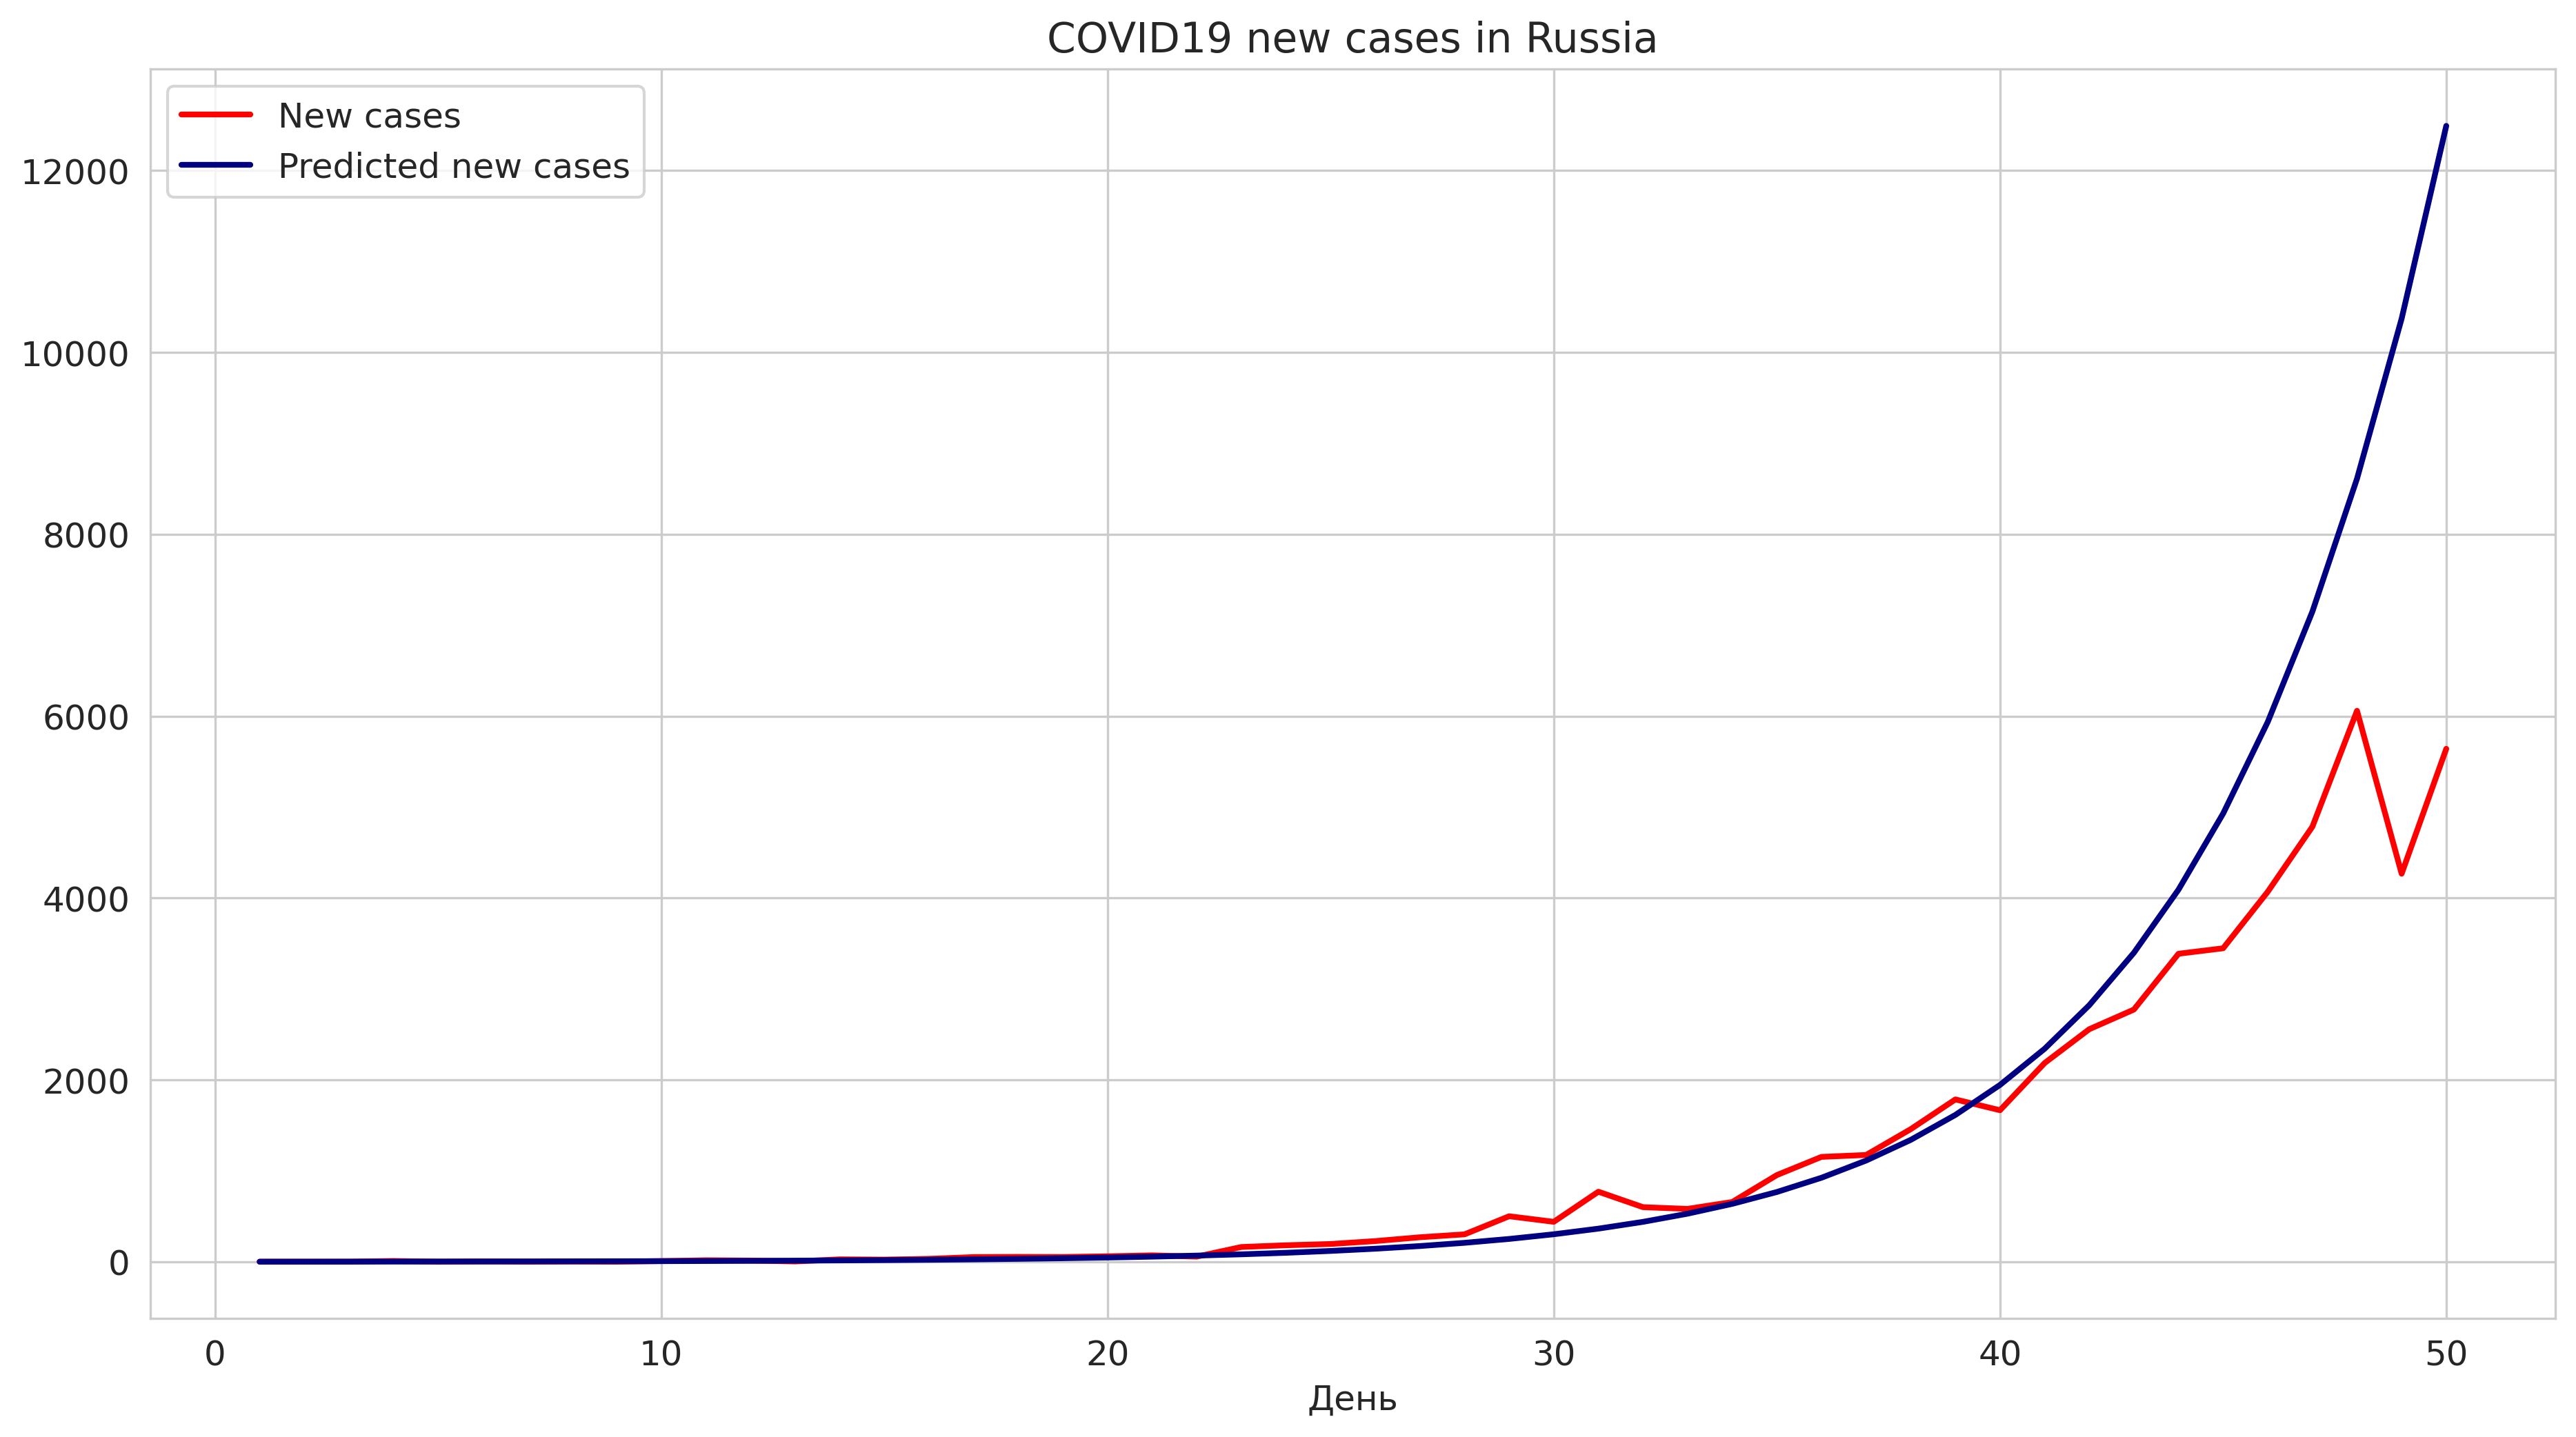

In [19]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlabel("День")
ax.plot(train_df['date'], train_df["new_cases"], label="New cases", c="red", linewidth=2)
ax.plot(train_df["date"], np.exp(lr_new_cases.predict(train_df["date"].values.reshape(-1, 1))), 
        label="Predicted new cases", c="navy", linewidth=2)
ax.set_title("COVID19 new cases in Russia")
ax.legend(fontsize=legend_fontsize)
plt.show()

### b. 

    Запишем сначала формулы для получения апостериорного распределения:
$$ \Sigma^{-1} = \Sigma_{0}^{-1} + \frac{1}{\sigma^2}X^{T}X $$
$$ \overline{\mu} = \Sigma (\Sigma_{0}^{-1}\overline{\mu}_{0} + \frac{1}{\sigma^2}X^{T}\overline{y}) $$
    И положим:
$$ \overline{\mu}_{0} = (intercept, w_1)^T $$
$$ \Sigma_{0} = I,$$
    хотя можно было взять другие параметры, потому что с каждым байесовским обновлением параметров получается быстрая сходимость к параметрам, оценным в регресии.

In [20]:
sigma_noise_new_cases = np.std(np.log(train_df["new_cases"]) - lr_new_cases.predict(train_df["date"].values.reshape(-1, 1)))
sigma_noise_total_cases = np.std(np.log(train_df["total_cases"]) - lr_total_cases.predict(train_df["date"].values.reshape(-1, 1)))

In [21]:
I_new_cases = np.eye(2)
I_total_cases = np.eye(2)
mu_0_new_cases = np.array([lr_new_cases.intercept_, lr_new_cases.coef_[0]])
mu_0_total_cases = np.array([lr_total_cases.intercept_, lr_total_cases.coef_[0]])

In [22]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    x_matrix = np.hstack((np.array([1]), x)).reshape(1, -1)
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), mu.reshape(-1, 1))
                     + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([[y]]))
                    )
    return mu_n.reshape(-1), sigma_n

In [23]:
cur_mu_new_cases, cur_sigma_new_cases = mu_0_new_cases, I_new_cases
cur_mu_total_cases, cur_sigma_total_cases = mu_0_total_cases, I_total_cases
for index, row in train_df.iterrows():
    cur_mu_new_cases, cur_sigma_new_cases = bayesian_update(mu=cur_mu_new_cases, sigma=cur_sigma_new_cases, 
                                                            x=row["date"], y=np.log(row["new_cases"]),
                                                            sigma_noise=sigma_noise_new_cases)
    cur_mu_total_cases, cur_sigma_total_cases = bayesian_update(mu=cur_mu_total_cases, sigma=cur_sigma_total_cases, 
                                                            x=row["date"], y=np.log(row["total_cases"]),
                                                            sigma_noise=sigma_noise_total_cases)

## c.

In [24]:
N = 1000
xs_train = np.linspace(0, 50, N)

In [25]:
num_may_day = 59
num_jun_day = 90
num_sep_day = 182

In [32]:
def myplot_sample_exponents(mu, sigma, n=100, is_new_cases=True, is_test=False, points=None):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    # Посэмплируем и порисуем экспоненты
    my_w = np.random.multivariate_normal(mu, sigma, n)
    # plt.axis('equal')
    if is_test:
        xs = xs_test
    else:
        xs = xs_train
    for w in my_w:
        ax.plot(xs, np.exp(w[0] + w[1] * xs), 'k-', lw=.4)
    if is_new_cases:
        ax.plot(xs, np.exp(lr_new_cases.predict(xs.reshape(-1, 1))), 'k-', lw=2, c="red", label="Predicted new cases")
        if not is_test:
            plt.ylim((0, 12000))
    else:
        ax.plot(xs, np.exp(lr_total_cases.predict(xs.reshape(-1, 1))), 'k-', lw=2, c="dodgerblue", label="Predicted total cases")
        if not is_test:
            ax.set_ylim((0, 100000))
    if not is_test:
        ax.set_xlim((1, 50))
    else:
        ax.set_xlim((100, 200))
    ax.set_xlabel("Day")
    ax.legend(fontsize=legend_fontsize)
    if not points is None:
        ax.scatter(points[0], points[1], marker='*', s=200)

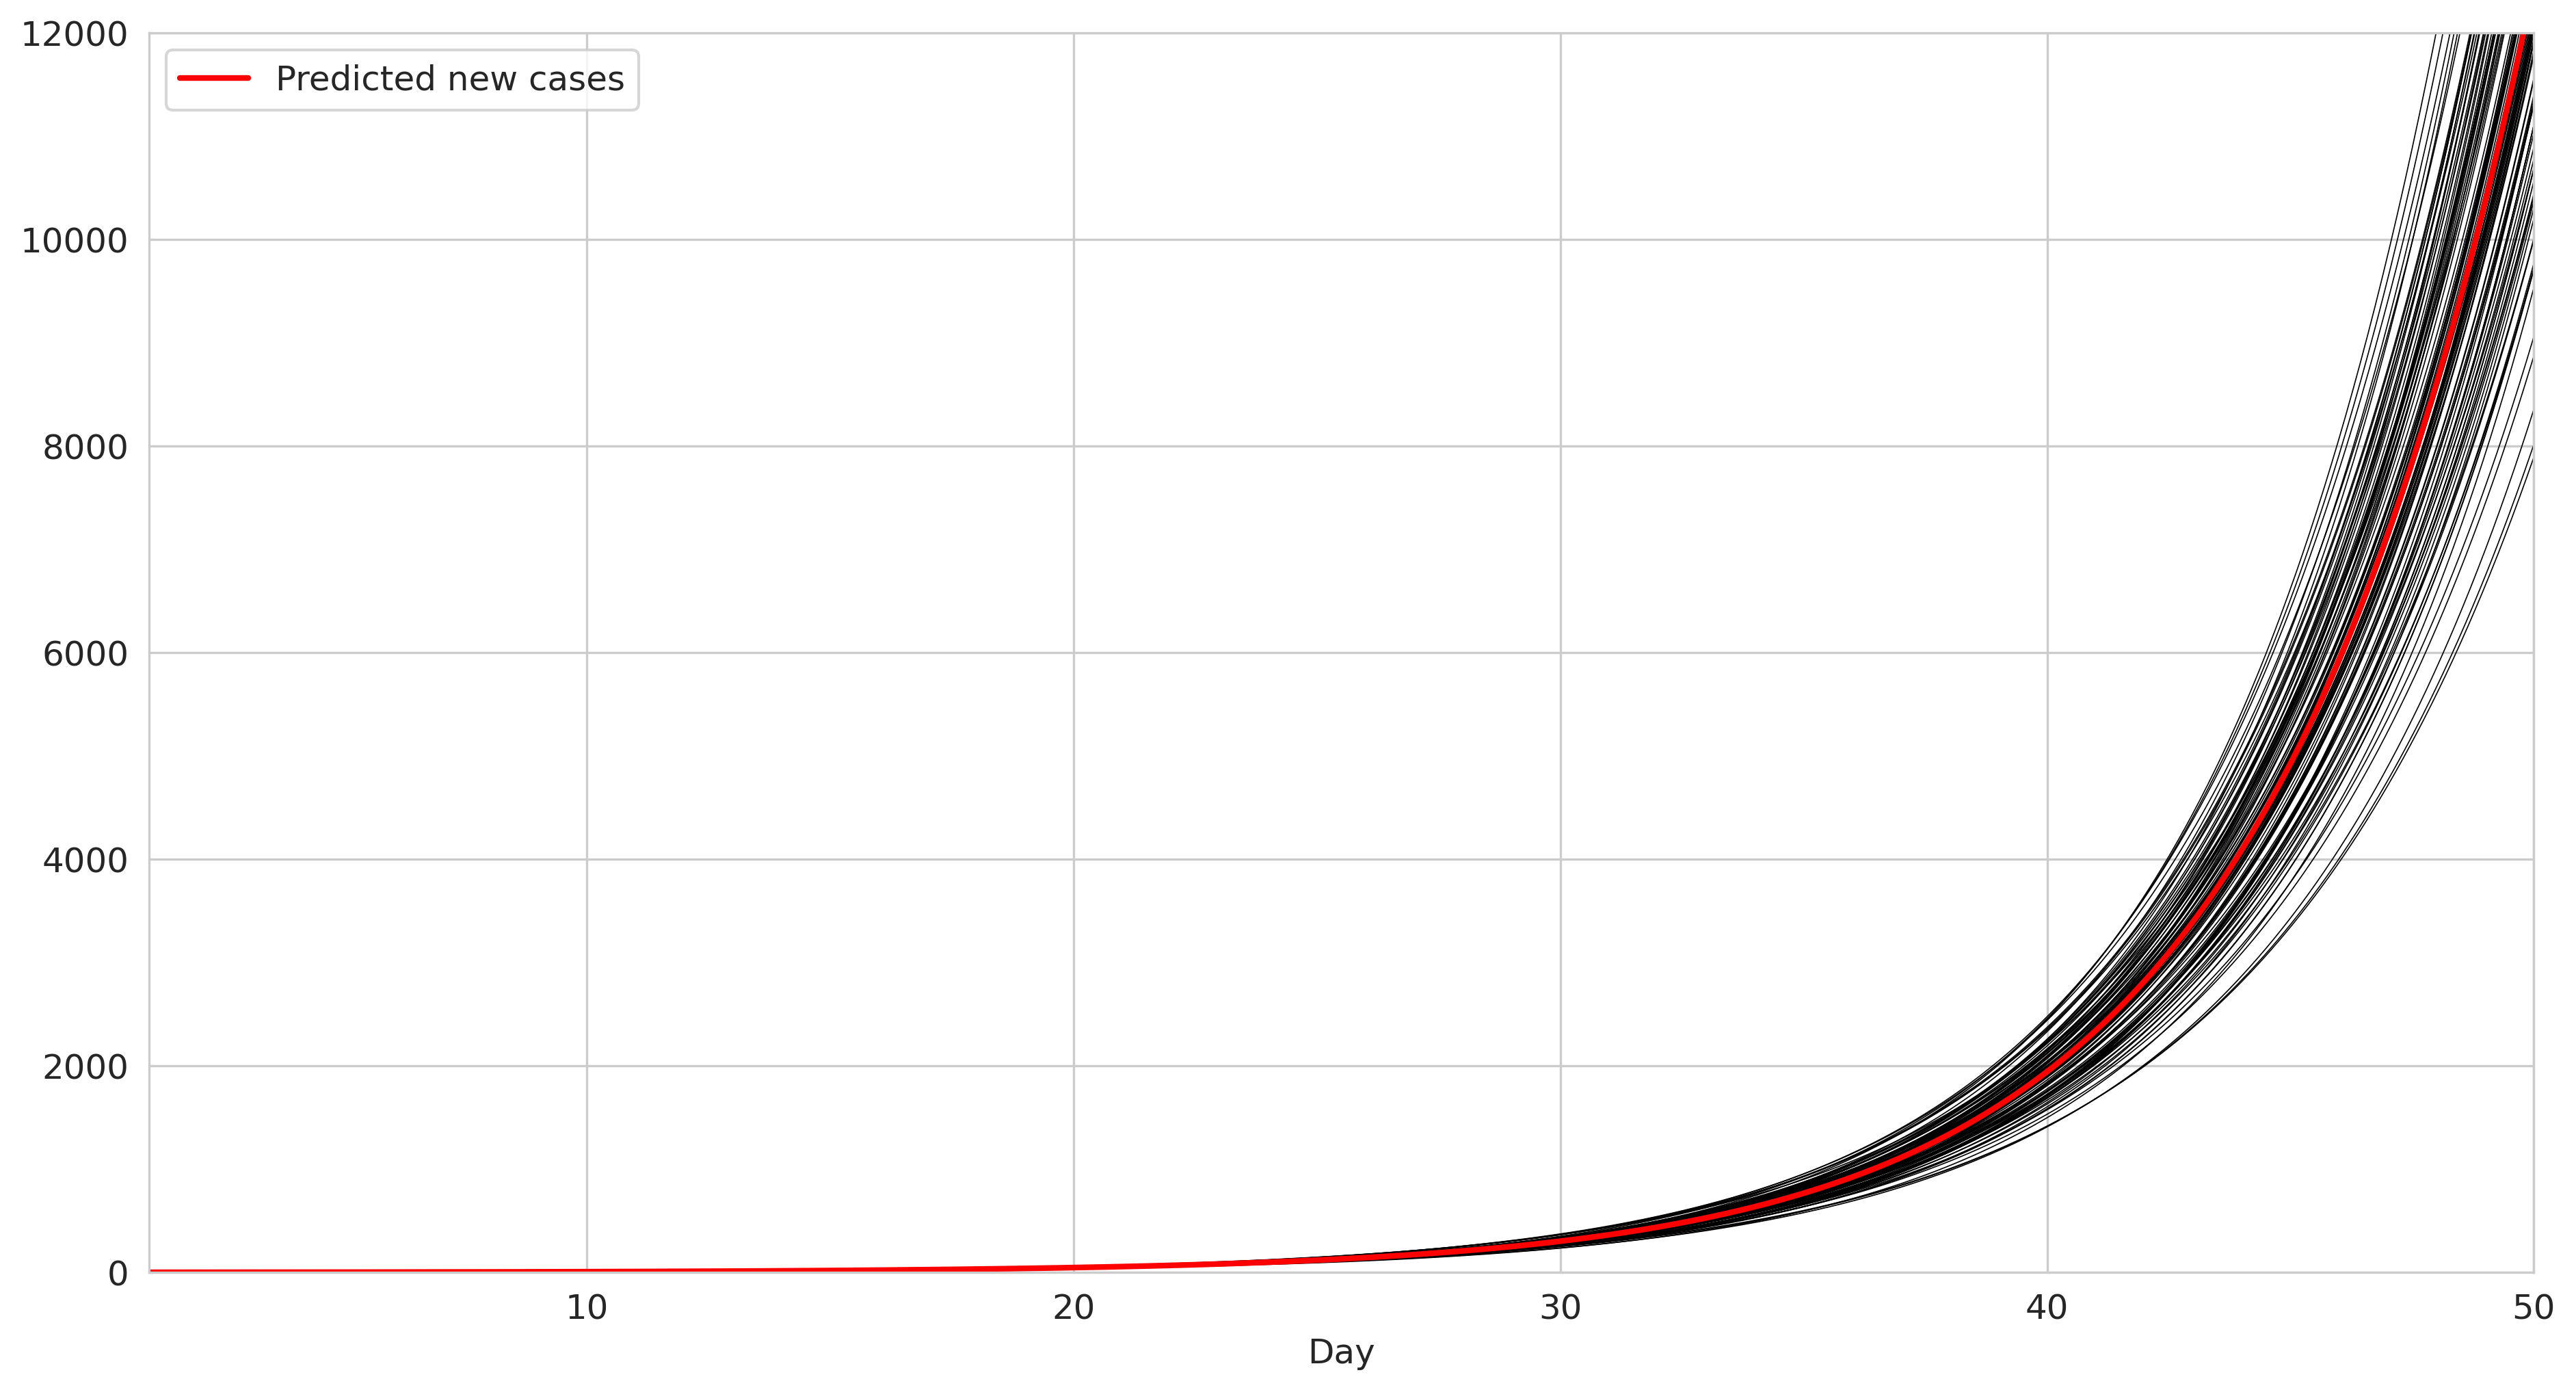

In [33]:
myplot_sample_exponents(cur_mu_new_cases, cur_sigma_new_cases, n=100)

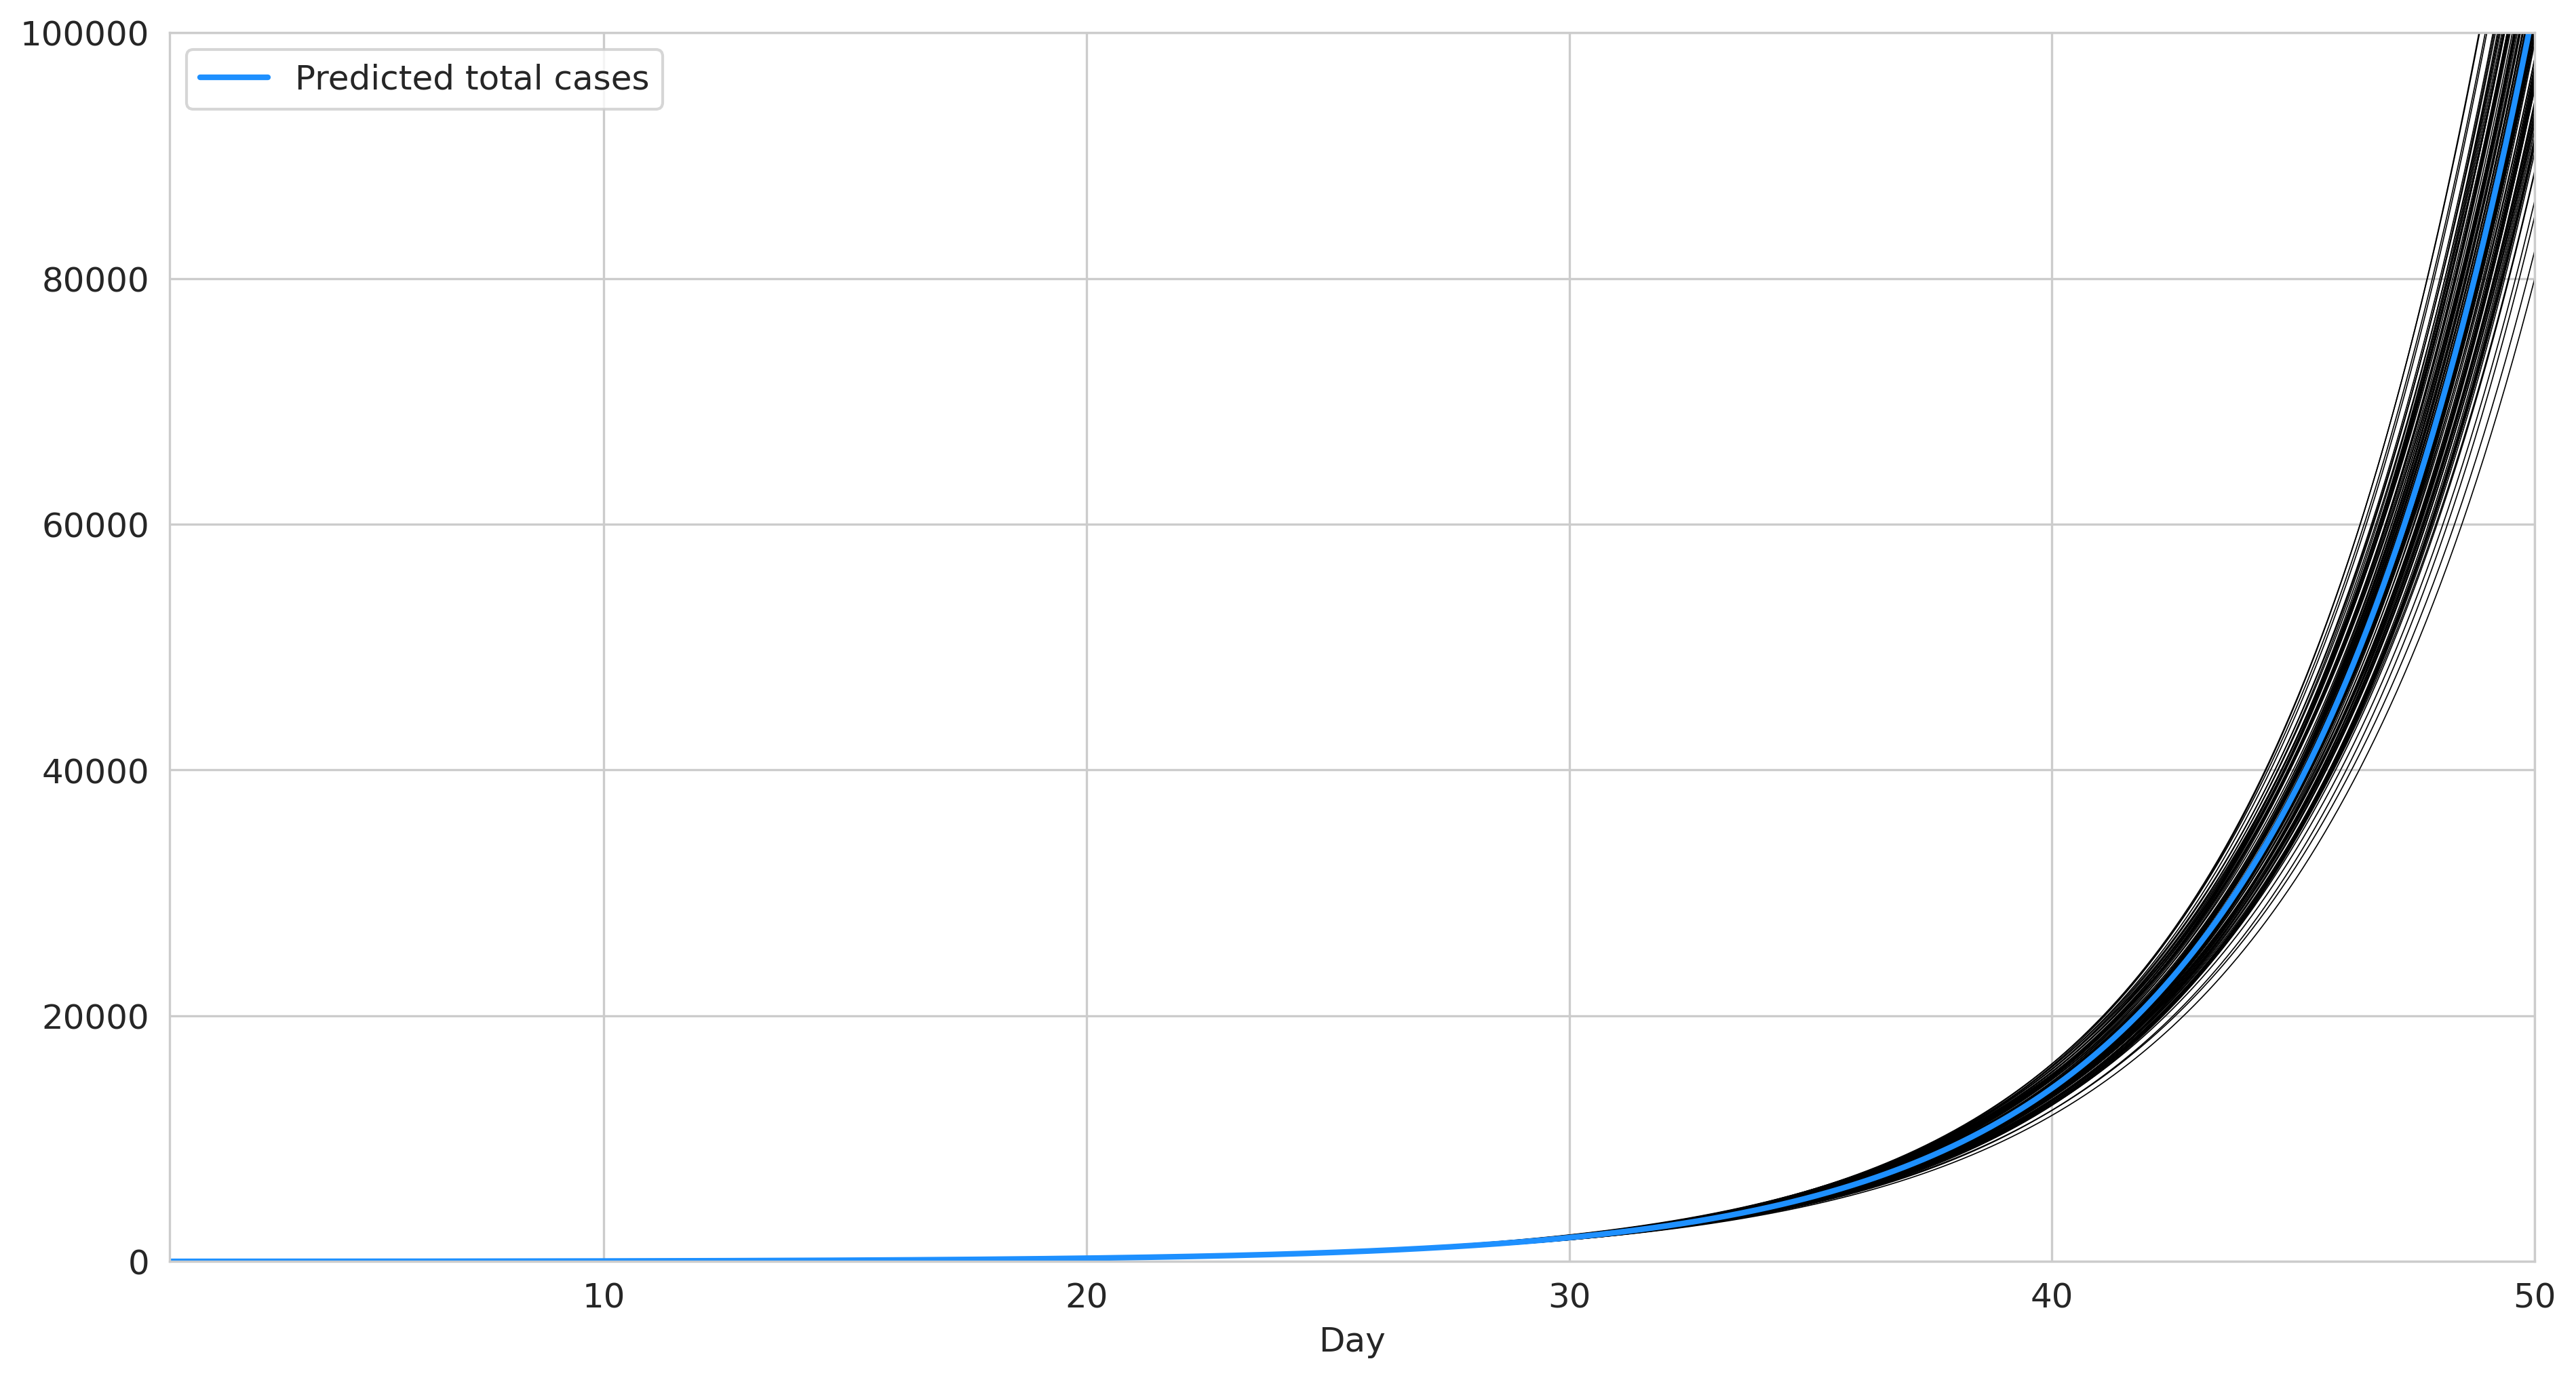

In [34]:
myplot_sample_exponents(cur_mu_total_cases, cur_sigma_total_cases, n=100, is_new_cases=False)

In [35]:
N = 1000
xs_test = np.linspace(51, 200, N)

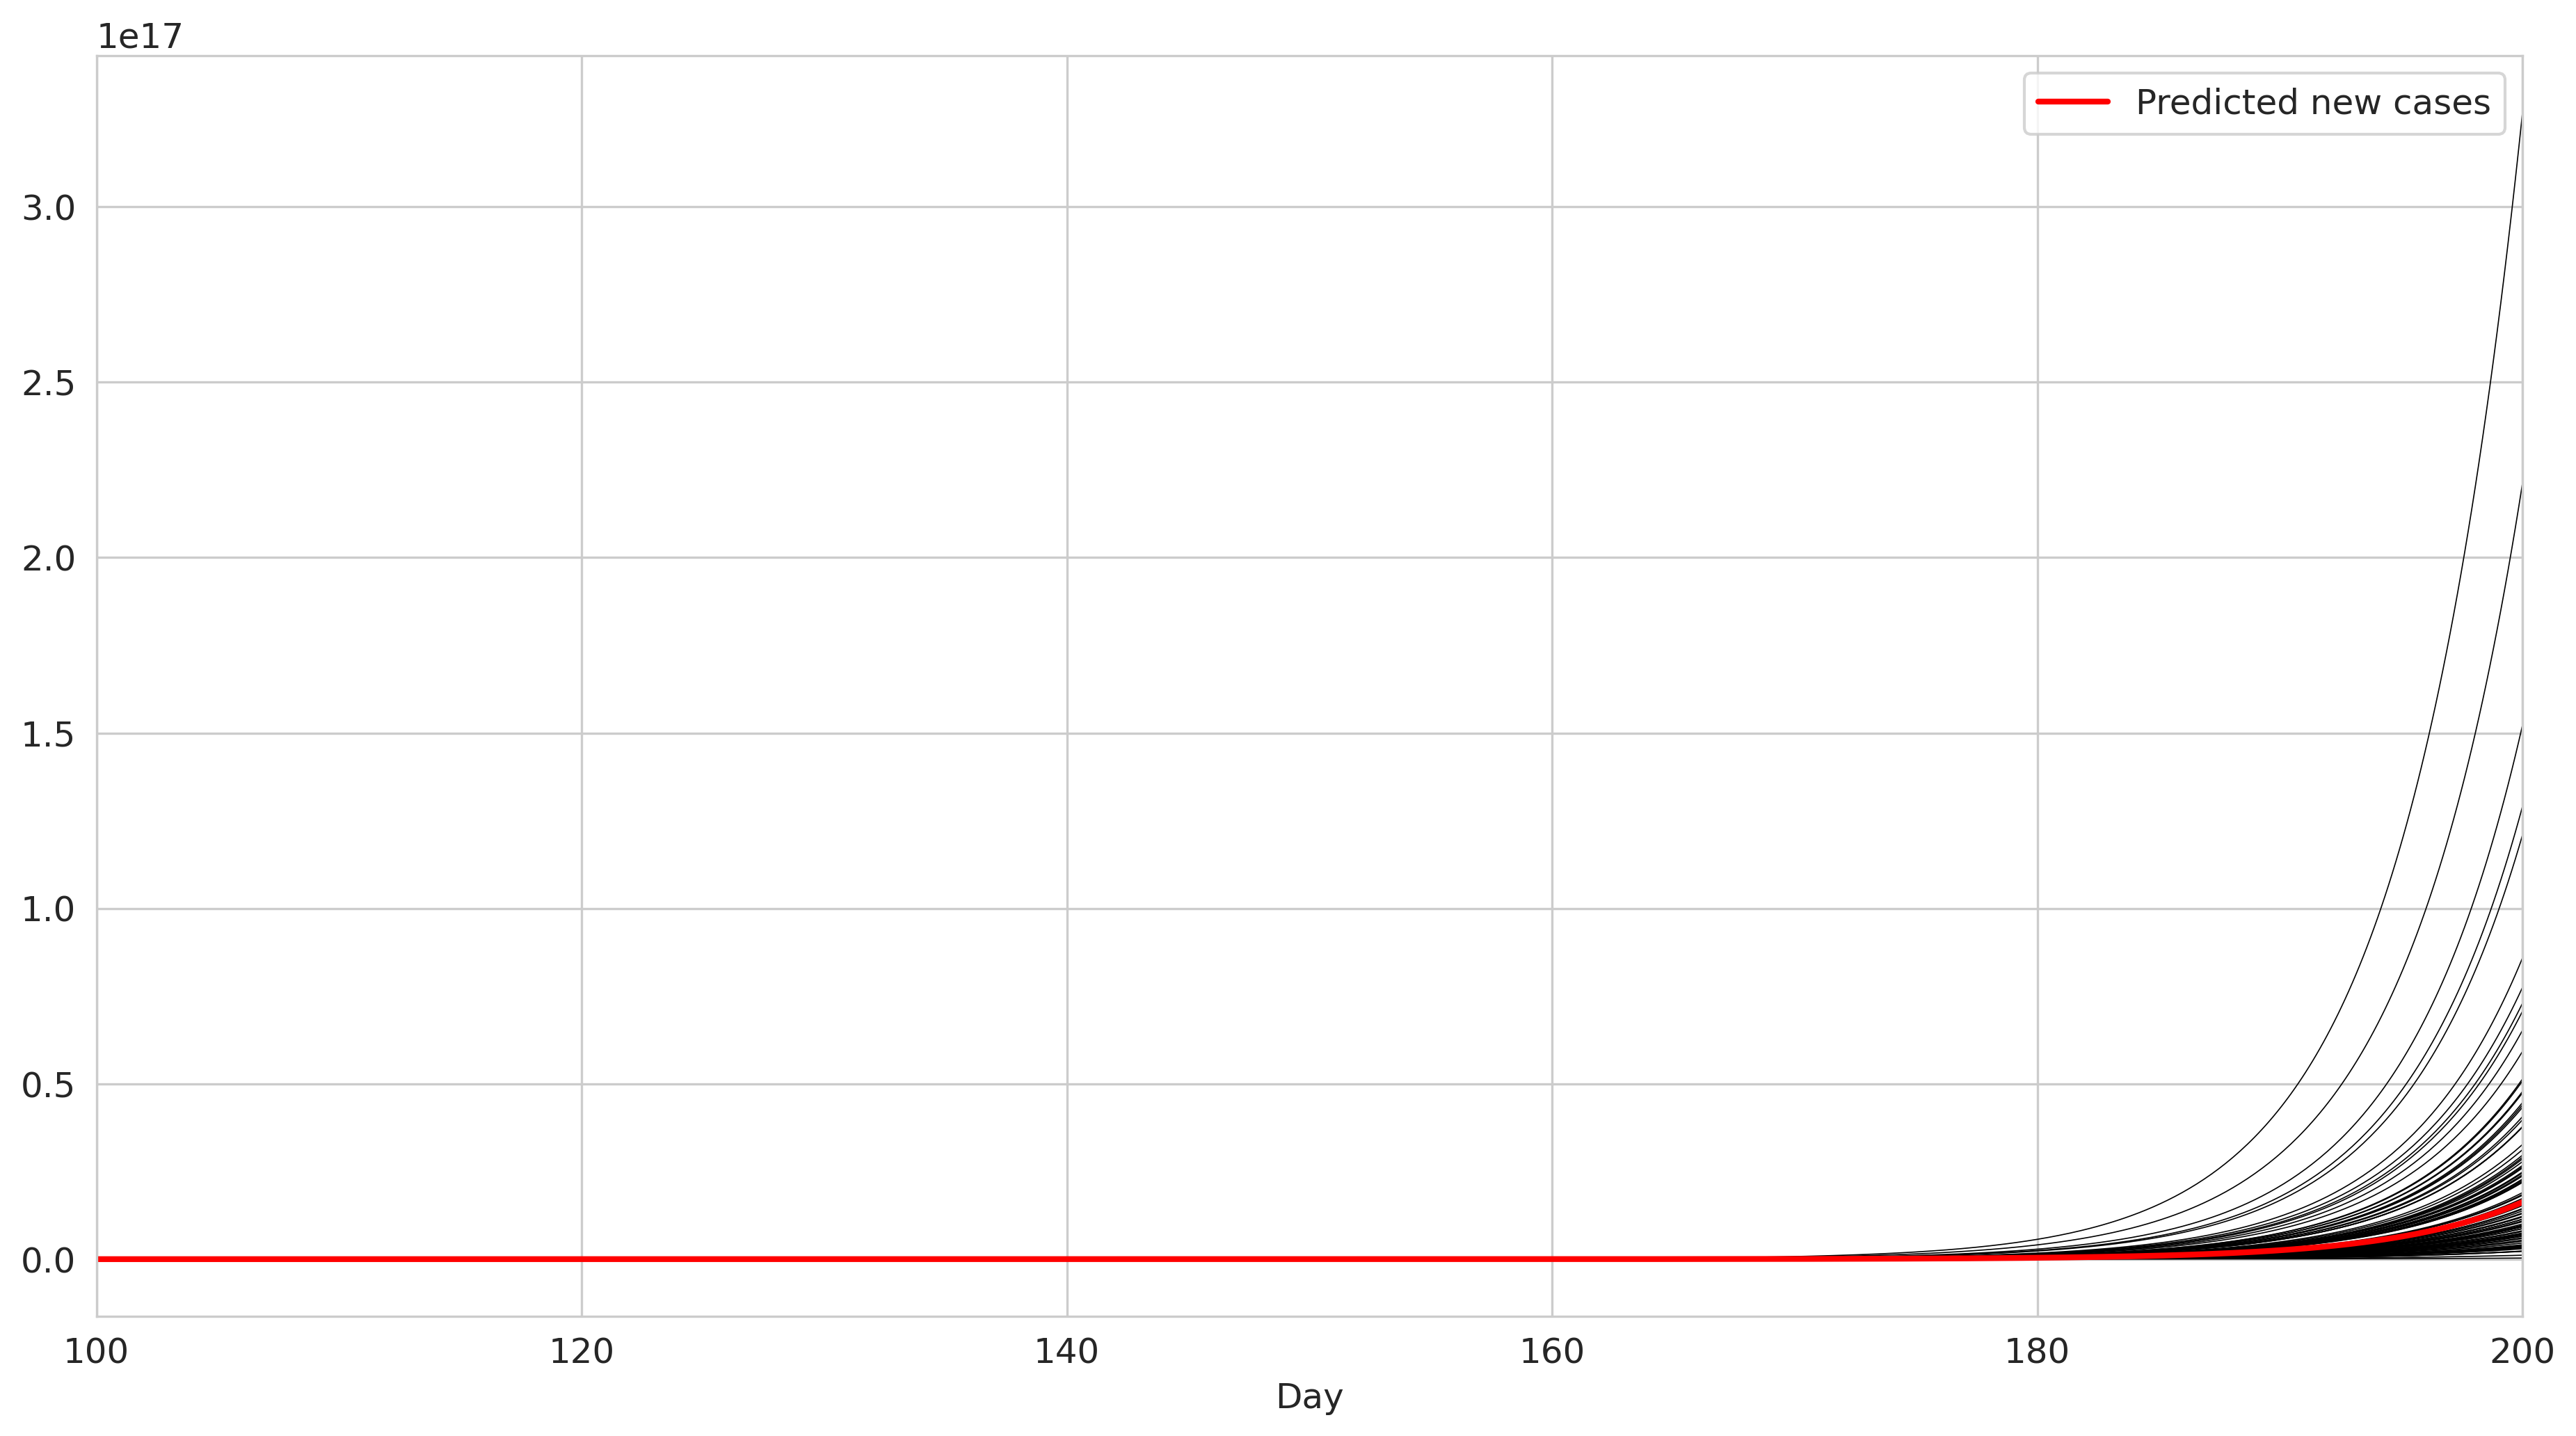

In [36]:
myplot_sample_exponents(cur_mu_new_cases, cur_sigma_new_cases, is_test=True, n=100)

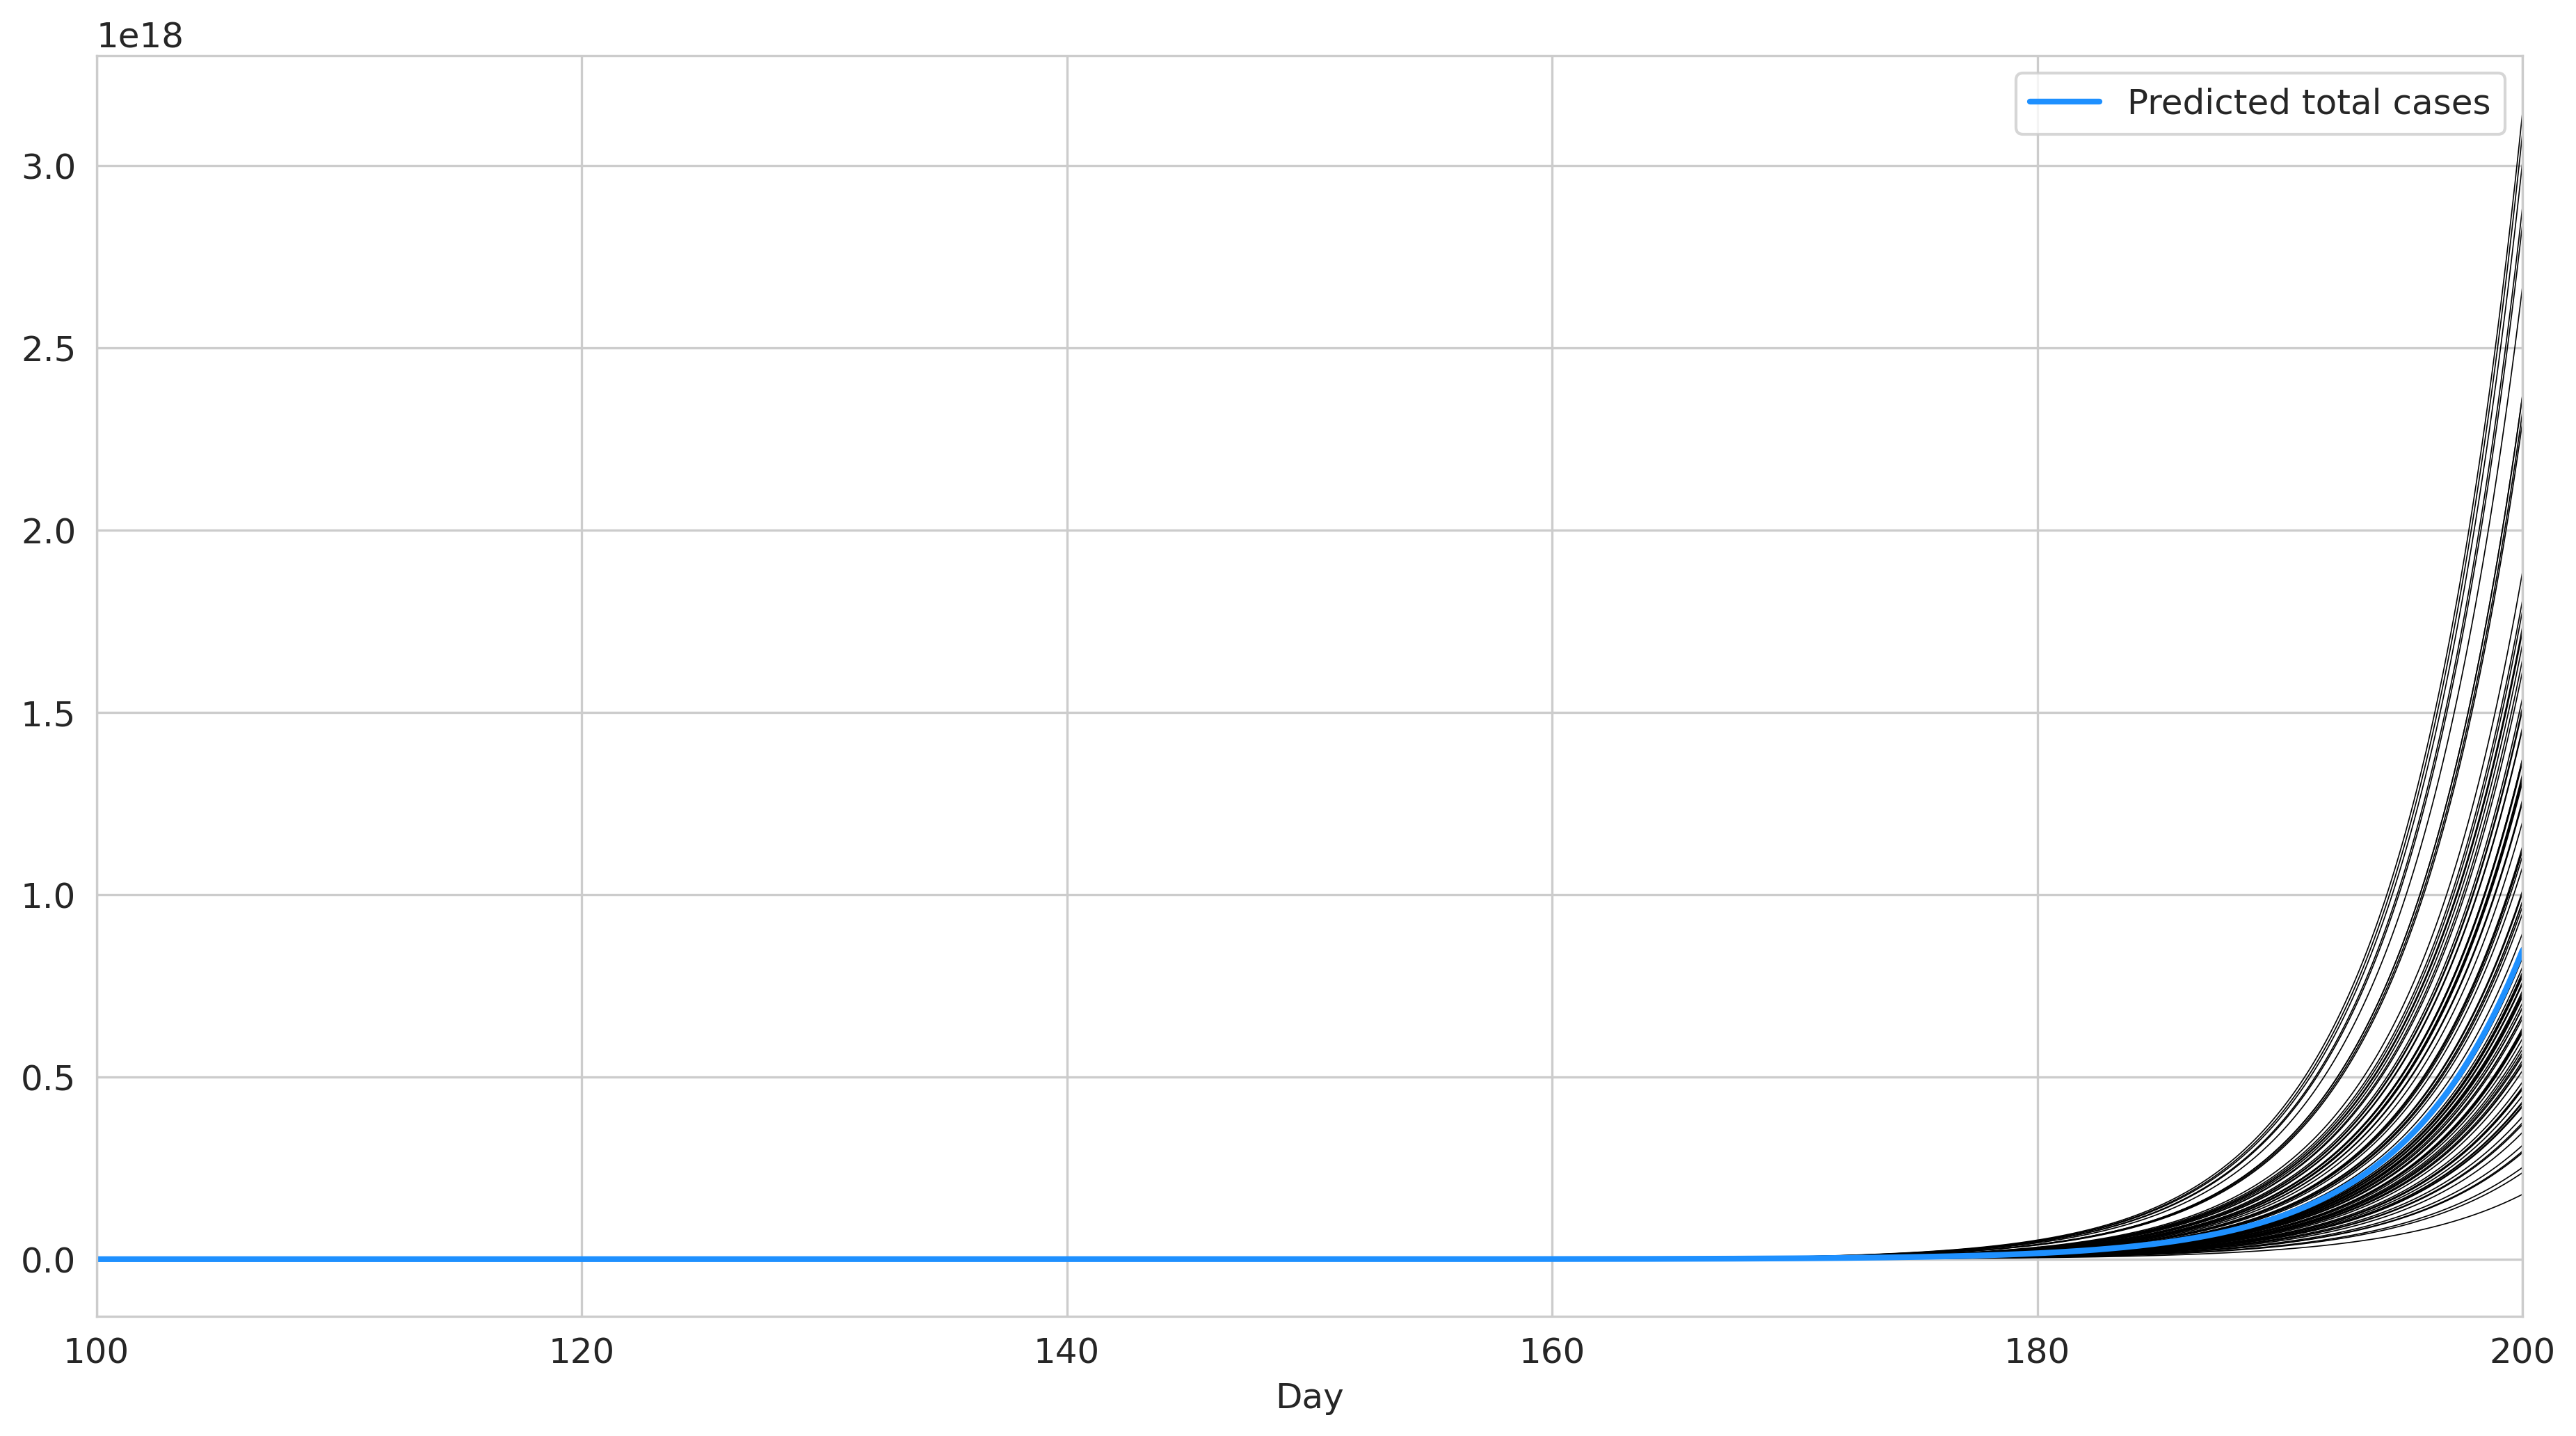

In [37]:
myplot_sample_exponents(cur_mu_total_cases, cur_sigma_total_cases, is_test=True, n=100, is_new_cases=False)

In [38]:
total_cases_w = np.random.multivariate_normal(cur_mu_total_cases, cur_sigma_total_cases, 100)
may_total_cases = np.mean(list(map(lambda w: np.exp(w[0] + w[1] * num_may_day), total_cases_w)))
jun_total_cases = np.mean(list(map(lambda w: np.exp(w[0] + w[1] * num_jun_day), total_cases_w)))
sep_total_cases = np.mean(list(map(lambda w: np.exp(w[0] + w[1] * num_sep_day), total_cases_w)))

In [58]:
# число заболевших к 1 мая
may_total_cases

632926.5424997177

In [40]:
# число заболевших к 1 июня
jun_total_cases

305019729.6574009

In [41]:
# число заболевших к 1 сентября
sep_total_cases

2.9752118767331828e+16

## 3

### a.

Поскольку использовать такой вид сигмоиды в явном виде довольно сложно, т.к. она выражается с помощью интеграла, то сразу приходит идея продифференцировать её и получить подынтегральную функцию с константой и подстановкой из верхнего предела.
Далее, для того, чтобы избавиться от экспоненты, берем логарифм и получаем полиномиальную регрессию, параметры которой уже можно оценить. Можно заметить, что нам повезло, потому что взятие производной делать не нужно, т.к. $(\text{total_cases})' = \text{new_cases}$. Тут можно провести аналогию с cdf и pdf.

### b.

In [43]:
train_df.loc[:, "date_2"] = train_df["date"].apply(lambda x: x ** 2)
test_df.loc[:, "date_2"] = test_df["date"].apply(lambda x: x ** 2)

In [44]:
lr_new_cases_sigmoid = LinearRegression().fit(train_df.loc[:, ["date", "date_2"]], np.log(train_df["new_cases"]))

In [45]:
sigma_noise_new_cases_sigmoid = np.std(np.log(train_df["new_cases"]) - lr_new_cases_sigmoid.predict(train_df.loc[:, ["date", "date_2"]]))

In [46]:
I_new_cases_sigmoid = np.eye(3, dtype="float32")
mu_0_new_cases_sigmoid = np.array([lr_new_cases_sigmoid.intercept_, 
                                   lr_new_cases_sigmoid.coef_[0], 
                                   lr_new_cases_sigmoid.coef_[1]], dtype="float32")

In [47]:
cur_mu_new_cases_sigmoid, cur_sigma_new_cases_sigmoid = mu_0_new_cases_sigmoid, I_new_cases_sigmoid
for index, row in train_df.iterrows():
    cur_mu_new_cases_sigmoid, cur_sigma_new_cases_sigmoid = bayesian_update(mu=cur_mu_new_cases_sigmoid, 
                                                                            sigma=cur_sigma_new_cases_sigmoid, 
                                                                            x=row[["date", "date_2"]].values, y=np.log(row["new_cases"]),
                                                                            sigma_noise=sigma_noise_new_cases_sigmoid)

### c.

In [48]:
xs_sigmoid = np.arange(1, 183)

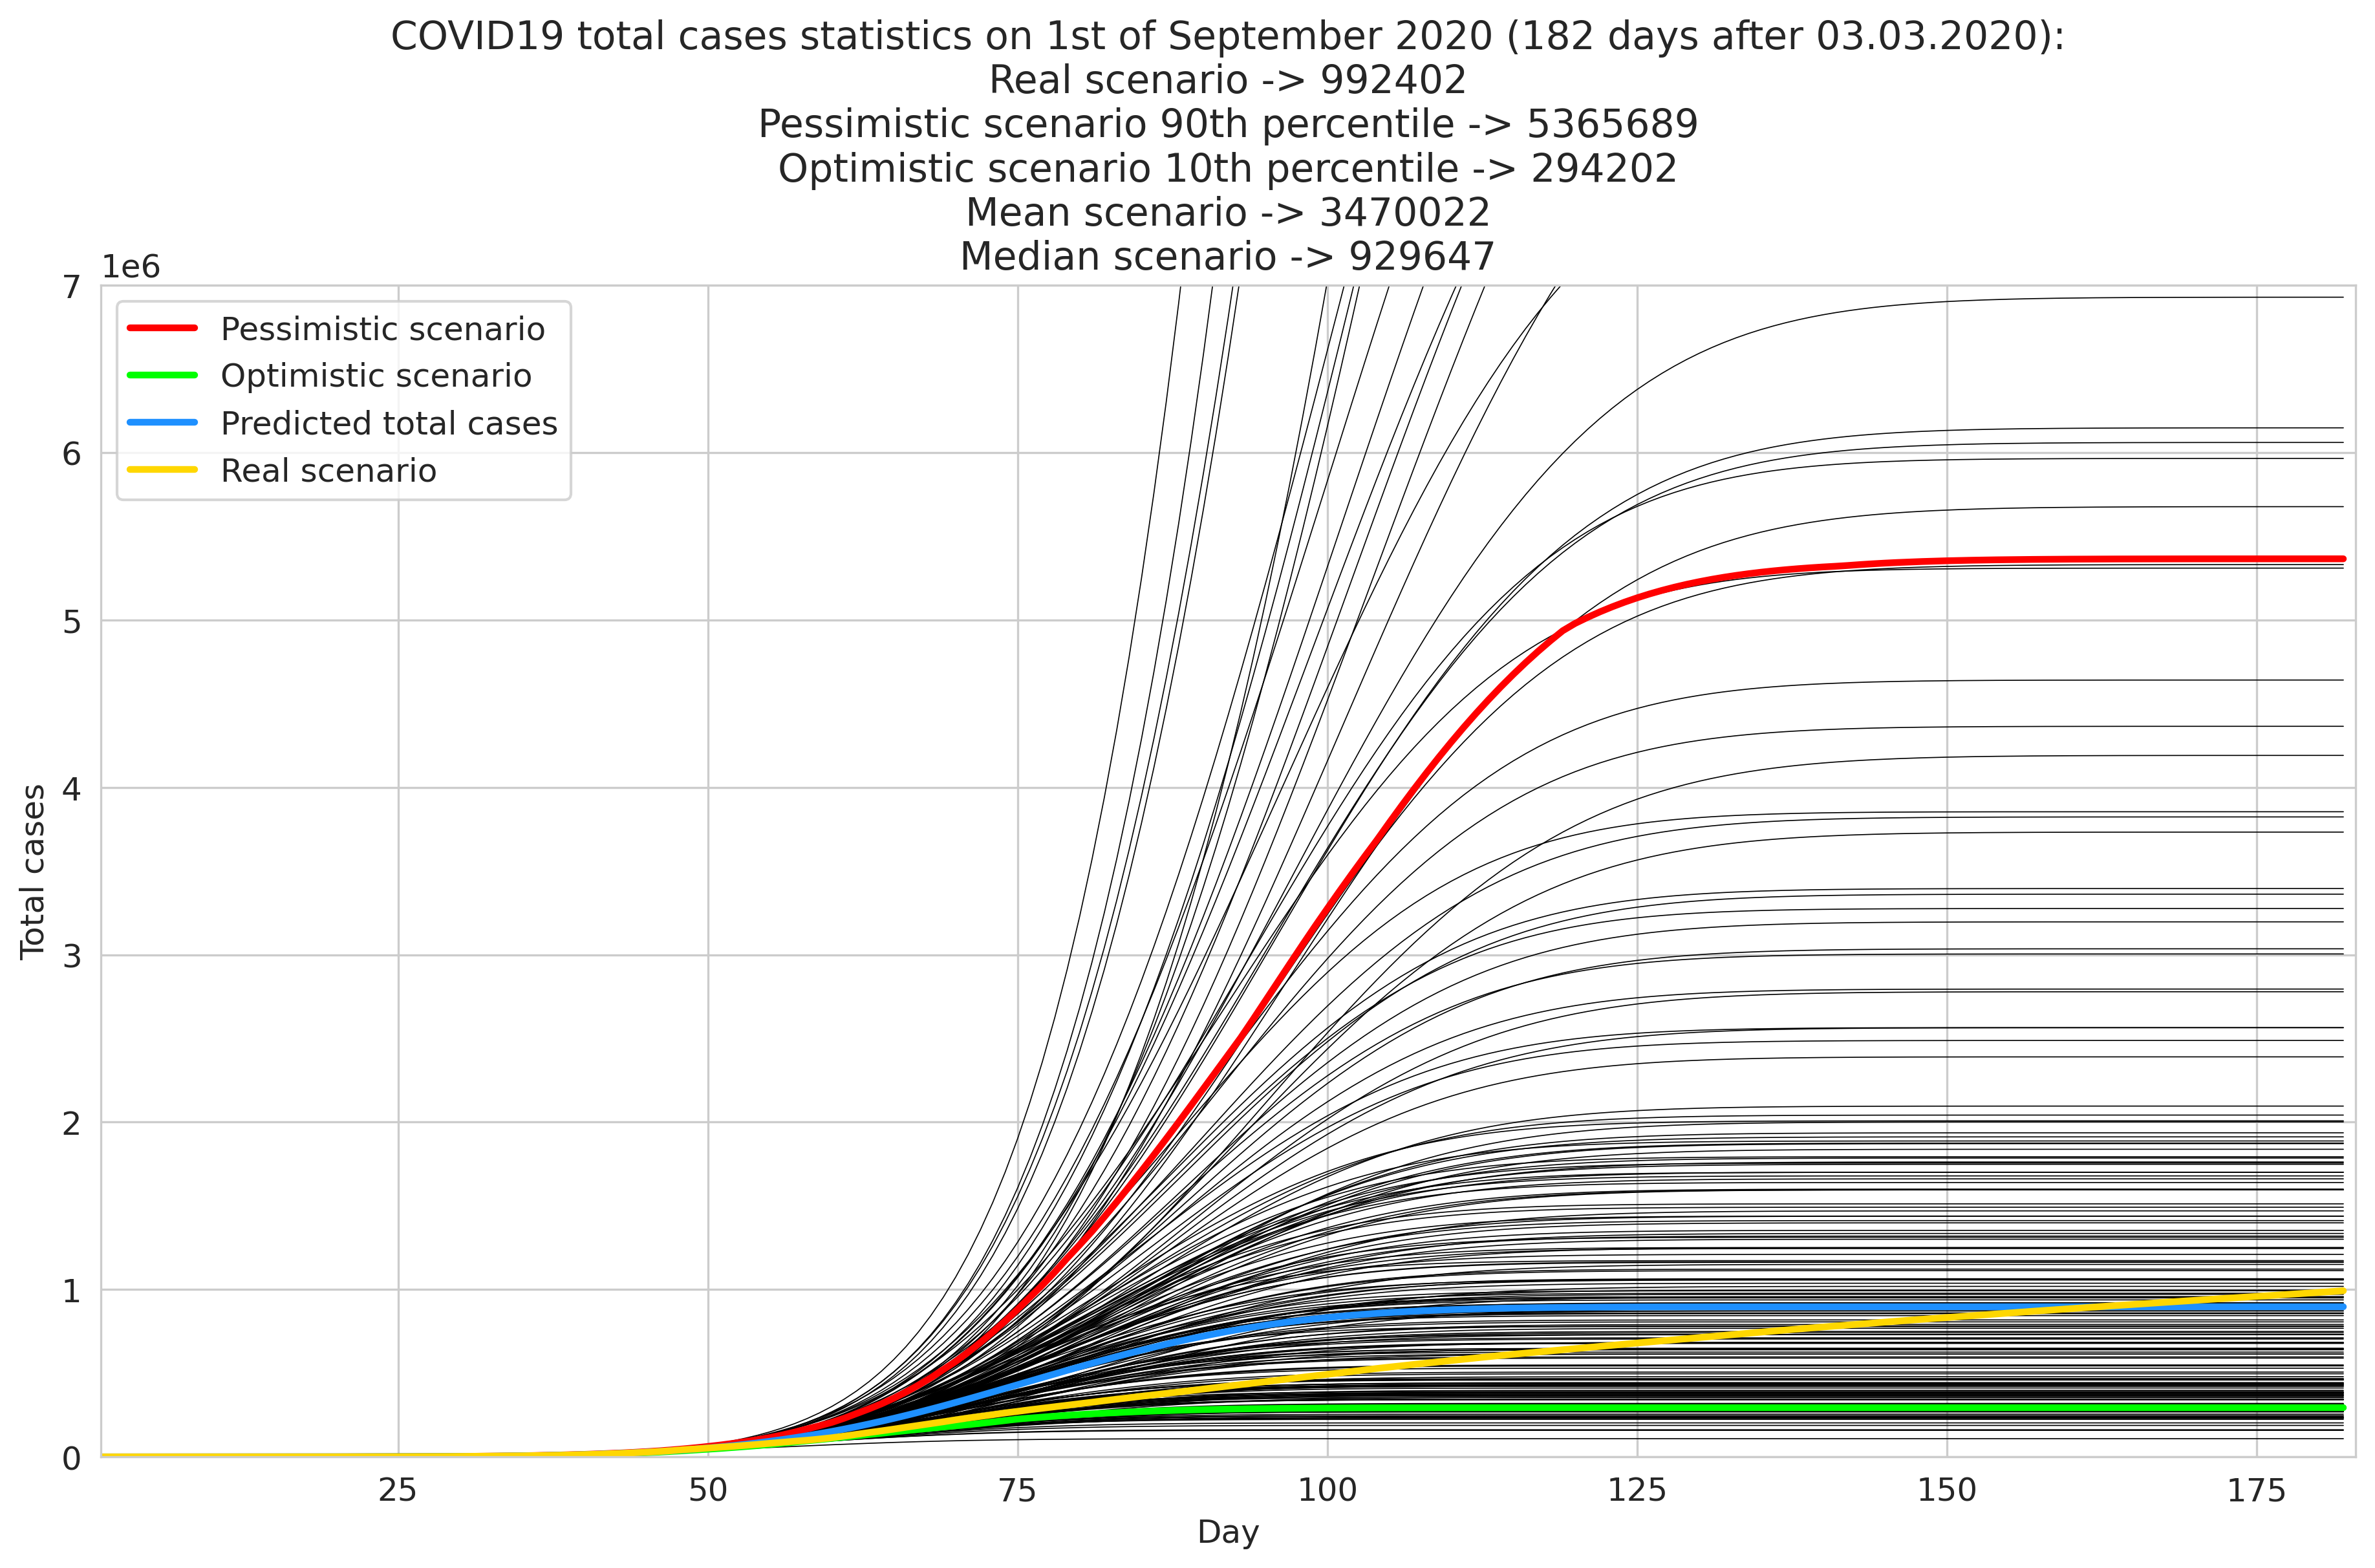

In [60]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
w_sigmoid = np.random.multivariate_normal(cur_mu_new_cases_sigmoid, cur_sigma_new_cases_sigmoid, 200)
total_cases_samples = np.empty([1, len(xs_sigmoid)])
for w in w_sigmoid:
    sample = np.cumsum(np.exp(w[0] + w[1] * xs_sigmoid + w[2] * xs_sigmoid * xs_sigmoid))
    total_cases_samples = np.vstack((total_cases_samples, sample))
    ax.plot(xs_sigmoid, sample, 'k-', lw=.4)
total_cases_samples = total_cases_samples[1:,:]
ax.plot(xs_sigmoid, np.quantile(total_cases_samples, q=0.9, axis=0), 'k-', lw=2.5, c="red", label="Pessimistic scenario")
ax.plot(xs_sigmoid, np.quantile(total_cases_samples, q=0.1, axis=0), 'k-', lw=2.5, c="lime", label="Optimistic scenario")
ax.plot(xs_sigmoid, np.cumsum(np.exp(lr_new_cases_sigmoid.predict(np.hstack((xs_sigmoid.reshape(-1, 1), xs_sigmoid.reshape(-1, 1) ** 2))))), 'k-', lw=2.5, c="dodgerblue", label="Predicted total cases")
ax.plot(xs_sigmoid, covid19_df.loc[covid19_df["date"] <= 182]["total_cases"], 'k-', lw=2.5, c="gold", label="Real scenario")
ax.set_xlim((1, 183))
ax.set_ylim((0, 7e6))
ax.set_xlabel("Day")
ax.set_ylabel("Total cases")
pess_sc245 = np.quantile(total_cases_samples[:,(num_sep_day - 1)], q=0.9)
opt_sc245 = np.quantile(total_cases_samples[:,(num_sep_day - 1)], q=0.1)
mean_sc245 = np.mean(total_cases_samples[:,(num_sep_day - 1)])
med_sc245 = np.quantile(total_cases_samples[:,(num_sep_day - 1)], q=0.5)
real_cases = f"Real scenario -> {int(covid19_df.loc[covid19_df['date'] == num_sep_day]['total_cases'].values[0])}"
predicted_pess = f"Pessimistic scenario 90th percentile -> {int(pess_sc245)}"
predicted_opt = f"Optimistic scenario 10th percentile -> {int(opt_sc245)}"
predicted_mean = f"Mean scenario -> {int(mean_sc245)}"
predicted_med = f"Median scenario -> {int(med_sc245)}"
tmp_title = "COVID19 total cases statistics on 1st of September 2020 (182 days after 03.03.2020):"

# ax.scatter(num_sep_day, covid19_df.loc[covid19_df['date'] == num_sep_day]['total_cases'].values[0], marker='D', s=50, c="gold")
# ax.scatter(num_sep_day, pess_sc245, marker='D', s=50, c="red")
# ax.scatter(num_sep_day, opt_sc245, marker='D', s=50, c="lime")
# ax.scatter(num_sep_day, mean_sc245, marker='D', s=50, c="blue")
# ax.scatter(num_sep_day, med_sc245, marker='D', s=50, c="navy")

ax.set_title("\n".join([tmp_title, real_cases, predicted_pess, predicted_opt, predicted_mean, predicted_med]))
ax.legend(fontsize=legend_fontsize)

## 5

    Во-первых, моделирование пандемии с помощью экспоненциальной зависимости слишком пессимистично и не соотвествует реальности. Сигмоида подходит лучше, но в нашем примере её "точки перегиба" на реальных данных расположены дальше, чем у гауссиана.
    Во-вторых, на принятие решения о введении карантина будут влиять не только эпидемиологические факторы, но и например экономические и проч. Поэтому почти наверно принятие решения в таких случаях будет опираться на многие другие факторы и не всегда количество заболевших будет являться самым важным. Именно поэтому в каждой стране свои критерии введения карантина.